# Proyecto 04 - Proyecto Final


**Elizabet Kenny** / DS-Online-25 Acámica / Diciembre 2020


Profundiza y ajusta la resolución de tus proyectos. Agrega una fuente de datos, prueba un modelo nuevo o responde una pregunta nueva. Elabora un informe final que describa el proceso de toma de decisiones. Sustenta la razón por la cual usaste las librerías y aplicaste los métodos al dataset. Todos tus hallazgos deberán ser comunicados en función de la problemática y las preguntas que buscabas responder.


Para profundizar me gustaría hacer la ultima consigna que propone el Proyecto 3 al final: "¿Hay algo que te gustaría investigar o probar?": Me gustaria probar dos formas de tratamiento para Proyecto 3, **Analisis de Sentimiento**

## Dataset: The Multilingual Amazon Reviews Corpus (Proyecto 3)

En el **Proyecto 3** realicé una exhaustiva busqueda con ML para buscar predecir las calificaciones (stars) para cada critica, siendo en mi busqueda el modelo **Linear SVC** el que mejor performance obtuvo, aunque no logré poder subir su desempeño sobre todo por problemas de máquina. 

Ahora deseo experimentar nuevamente e ir más alla en la busqueda de nuevos modelos pero esta vez trataré de trabajar con un dataset más chico para poder tomar menos tiempo.

Aqui, refresco el objetivo que venimos trabajando desde P3: 
* "Implementa un modelo que, dada la crítica de un producto, asigne la cantidad de estrellas correspondiente."

Refiere a modelos de **clasificación** ya que el resultado es a buscar aquí es una clase, entre un número limitado de clases. Con clases me refiero a categorías arbitrarias según el tipo de problema, en este caso asignar a ana categoria de crítica (stars).

Dejaré en este proyecto mi procedimiento anterior de la exploración de datos *(al cual le marcaré algunas diferencias para trabajar luego el dataset)* para luego comenzar a implementar los modelos que deseo experimientar (Analisis de Sentimiento)

--------------------------------

In [1]:
#Librerias básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#El módulo itertools incluye un conjunto de funciones para trabajar con conjuntos de datos de secuencia
import itertools
from wordcloud import WordCloud #para hacer nube de palabras

#Librerias NLP
import nltk
import spacy
from spacy.lang.es.stop_words import STOP_WORDS
import re  # Importamos esta libreria que nos permite reemplazar caracteres y usar expresiones regulares
from collections import Counter
from nltk.corpus import wordnet

#Importación de los stopwords del español e impresión
stopwords = nltk.corpus.stopwords
stopwords = stopwords.words('spanish')
#stopwords  impresión

#Vectorización
from sklearn.feature_extraction.text import CountVectorizer
#Transforma una matriz de recuento en una representación tf o tf-idf normalizada
from sklearn.feature_extraction.text import TfidfTransformer
#Convierta una colección de documentos sin procesar en una matriz de funciones TF-IDF.
from sklearn.feature_extraction.text import TfidfVectorizer


#Libreria para análisis de Sentimientos
from textblob import TextBlob

**INFO DEL DATASET - NLP - AMAZON REVIEWS**
    
Proporcionamos un conjunto de datos de reseñas de productos de Amazon para la clasificación **entre el 1 de noviembre de 2015 y el 1 de noviembre de 2019.**

Para cada idioma, hay 200.000, 5.000 y 5.000 revisiones en los conjuntos de formación, desarrollo y prueba, respectivamente. La cantidad máxima de reseñas por revisor es 20 y la cantidad máxima de reseñas por producto es 20. Todas las reseñas se truncan después de 2000 caracteres y todas las reseñas tienen al menos 20 caracteres - Pues el Dataset esta dividido en 3 archivos, uno para entrenamiento, otro para testeo y el ultimo para validación.

Cada instacia cuenta con:
* ID de critica, 
* ID de producto, 
* ID de usuario, 
* cantidad de estrellas, 
* descripción, 
* título,
* lenguaje 
* categoría del producto.


In [2]:
data = pd.read_json('dataset_es_dev.json', lines=True)

In [3]:
data.shape

(5000, 8)

In [4]:
data_test = pd.read_json('dataset_es_test.json', lines=True)

In [5]:
data_test.shape

(5000, 8)

In [6]:
data_train = pd.read_json('dataset_es_train.json', lines=True)

In [7]:
data_train

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes
...,...,...,...,...,...,...,...,...
199995,es_0715276,product_es_0317036,reviewer_es_0643604,5,Mando funciona perfectamente y cumple con toda...,Tal y como se describe,es,electronics
199996,es_0085190,product_es_0622919,reviewer_es_0466173,5,"Compré la batería con cierta reticencia, pero ...",Funciona perfectamente,es,electronics
199997,es_0484496,product_es_0358101,reviewer_es_0330744,5,Buena calidad. Satisfecha con la compra.,Buena calidad.,es,apparel
199998,es_0930141,product_es_0788855,reviewer_es_0694290,5,Perfecto para el cumple de mi hijo,Recomendado,es,toy


In [8]:
data_amazonfull= pd.concat([data, data_train, data_test], axis=0)
data_amazonfull #uniré todos para estudiarlos mejor

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty
...,...,...,...,...,...,...,...,...
4995,es_0685611,product_es_0919143,reviewer_es_0461769,5,Para lo que cuesta es perfecto porque cumple s...,Perfectos para lo que sirven,es,wireless
4996,es_0638242,product_es_0636134,reviewer_es_0214562,5,"Material muy flexible y cómodo, acorde a la de...","Buen vendedor, rápido y fiable.",es,wireless
4997,es_0760108,product_es_0078583,reviewer_es_0043609,5,Se ve bien el grabado,medallas con bonito grabado,es,home
4998,es_0070806,product_es_0359350,reviewer_es_0258717,5,lo compré para mi bici pero finalmente se lo h...,timbre,es,sports


Inicialmente unifico los 3 dataset al notar que estaban divididos en trabajo previo, sin embargo los concateno para poder explorar con detenimiento en conjunto y luego decidir cómo trabajar con estos datos con 210.000 registros de reviews.

### A - Exploración de datos y Procesamiento del Lenguaje Natural

In [9]:
data_amazonfull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   review_id         210000 non-null  object
 1   product_id        210000 non-null  object
 2   reviewer_id       210000 non-null  object
 3   stars             210000 non-null  int64 
 4   review_body       210000 non-null  object
 5   review_title      210000 non-null  object
 6   language          210000 non-null  object
 7   product_category  210000 non-null  object
dtypes: int64(1), object(7)
memory usage: 14.4+ MB


In [10]:
data_amazonfull.describe() #unico feature numérico stars

,stars
count,210000.000000
mean,3.000000
std,1.414217
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


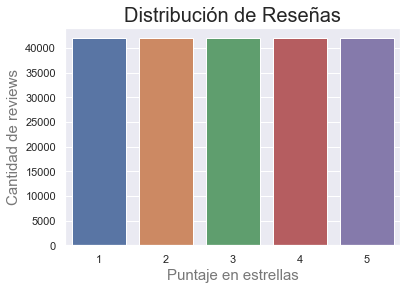

In [11]:
sns.countplot(x = 'stars', data = data_amazonfull)
plt.ylabel('Cantidad de reviews', size = 15, color ='#777777')
plt.xlabel('Puntaje en estrellas', size = 15, color ='#777777')
plt.title('Distribución de Reseñas', fontsize=20)
plt.show()

El dataset cuenta con una cantidad completamente distribuida de tipo de reviews en cada categoria de estrella.

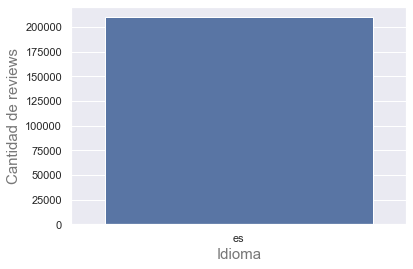

In [12]:
sns.countplot(x = 'language', data = data_amazonfull)
plt.ylabel('Cantidad de reviews', size = 15, color ='#777777')
plt.xlabel('Idioma', size = 15, color ='#777777')
plt.show()

Confirmo que todas las reviews sean en español

In [13]:
print('Cantidad de categorías:', len(data_amazonfull.product_category.unique()))

Cantidad de categorías: 30


¿De qué tipos de productos tenemos reviews?

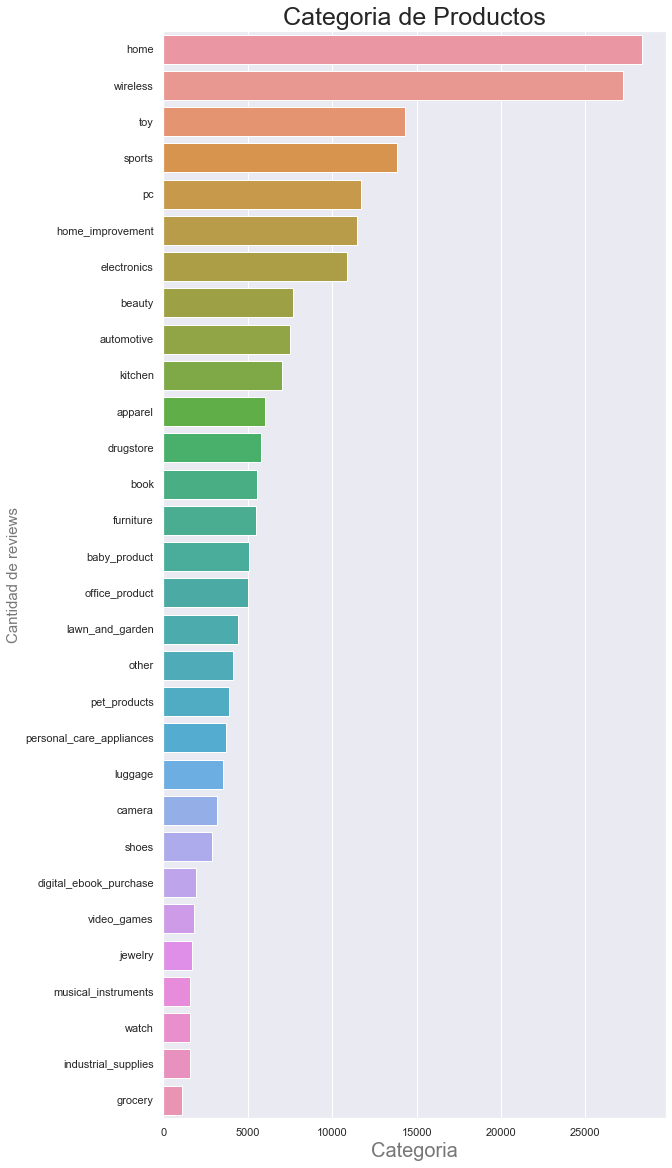

In [14]:
plt.figure(figsize = (9,20))

sns.countplot(y = 'product_category', 
              data = data_amazonfull,  
              order = data_amazonfull.product_category.value_counts().index)

#plt.xticks(rotation= 60)
plt.ylabel('Cantidad de reviews', size = 15, color ='#777777')
plt.xlabel('Categoria', size = 20, color ='#777777')
plt.title('Categoria de Productos', size=25)

plt.show()

¿Hay valores faltantes?

In [15]:
data_amazonfull.isna().sum()

review_id           0
product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        0
language            0
product_category    0
dtype: int64

¿Cuantos usuarios unicos han hecho reseñas?

In [16]:
print('Cantidad de usuarios:', len(data_amazonfull.reviewer_id.unique()))

Cantidad de usuarios: 187140


¿Cuántas reviews hay por cada usuarios?

In [17]:
rev_us = data_amazonfull.reviewer_id.value_counts()
rev_us

reviewer_es_0437514    7
reviewer_es_0588051    7
reviewer_es_0431022    7
reviewer_es_0336455    6
reviewer_es_0659252    6
                      ..
reviewer_es_0201642    1
reviewer_es_0925678    1
reviewer_es_0596863    1
reviewer_es_0983213    1
reviewer_es_0789489    1
Name: reviewer_id, Length: 187140, dtype: int64

In [18]:
print('Experiencia de las 7 reviews del usuario 0437514: ')
data_train[data_train.reviewer_id == 'reviewer_es_0437514']

Experiencia de las 7 reviews del usuario 0437514: 


,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
35801,es_0761893,product_es_0825301,reviewer_es_0437514,1,No estoy muy contenta. No se ven todas las apl...,No lo vilveria a comprar,es,pc
46687,es_0134144,product_es_0166287,reviewer_es_0437514,2,Yo lo compre como despertador para el dormitor...,Es muy grande,es,electronics
51789,es_0673033,product_es_0149056,reviewer_es_0437514,2,Debe influir quién te da el masaje o la fe.,No me sirve de nada,es,drugstore
82549,es_0564588,product_es_0315730,reviewer_es_0437514,3,"Las he comprado por su precio, algo mas barata...",No merece la pena,es,home
155874,es_0688433,product_es_0370804,reviewer_es_0437514,4,Eran las fechas navideñas y no lo encontrábamo...,Matilde,es,toy
176259,es_0167452,product_es_0117403,reviewer_es_0437514,5,Me las compre para fortalecer el suelo pélvico...,Funcionan,es,drugstore
194850,es_0765835,product_es_0202595,reviewer_es_0437514,5,Es perfecto para no encender las luces por la ...,Muy bien,es,home


¿Promedio de puntaje por categoria?

In [19]:
mean_p = data_amazonfull.groupby(['product_category'])[['stars']].mean().sort_values(by='stars', ascending=False)
mean_p

,stars
product_category,
book,3.404848
digital_ebook_purchase,3.361054
luggage,3.293531
musical_instruments,3.211443
grocery,3.159892
video_games,3.117712
camera,3.101572
shoes,3.100485
baby_product,3.088466


**Top 3 mejores y peores product_category promediales**

Distribución de las 3 mejores categorias AVG



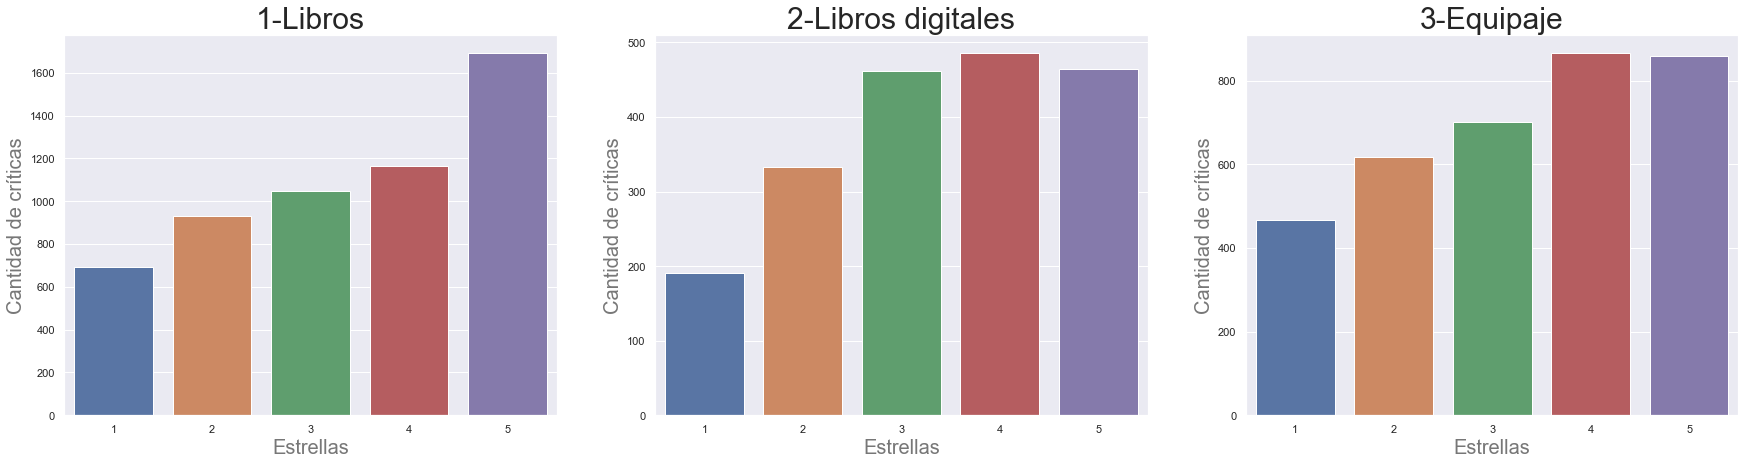

In [20]:
plt.figure(figsize=(30,7))

plt.subplot(131)
sns.countplot(x = "stars", data = data_amazonfull[data_amazonfull['product_category']== 'book'])
plt.title('1-Libros', fontsize=30)
plt.xlabel('Estrellas', color ='#777777', fontsize=20)
plt.ylabel('Cantidad de críticas', color ='#777777', fontsize=20)

plt.subplot(132)
sns.countplot(x = "stars", data = data_amazonfull[data_amazonfull['product_category']== 'digital_ebook_purchase'])
plt.title('2-Libros digitales', fontsize=30)
plt.xlabel('Estrellas', fontsize=20, color ='#777777')
plt.ylabel('Cantidad de críticas', fontsize=20, color ='#777777')

plt.subplot(133)
sns.countplot(x = "stars", data = data_amazonfull[data_amazonfull['product_category']== 'luggage'])
plt.title('3-Equipaje', fontsize=30)
plt.xlabel('Estrellas', fontsize=20, color ='#777777')
plt.ylabel('Cantidad de críticas', fontsize=20, color ='#777777')


plt.show()

Distribución de las 3 peores categorias promediales 


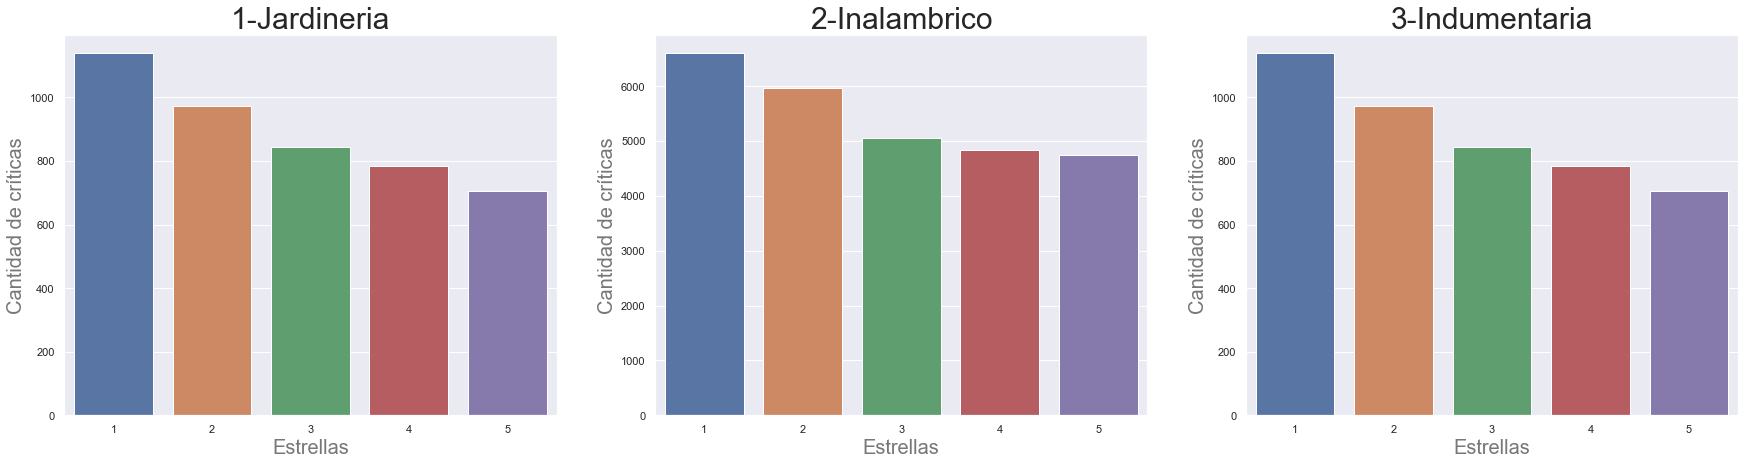

In [21]:
# Top 3 de peores puntuaciones por categoría de producto
plt.figure(figsize=(30,7))

plt.subplot(131)
sns.countplot(x = "stars", data = data_amazonfull[data_amazonfull['product_category']== 'lawn_and_garden'])
plt.title('1-Jardineria', fontsize=30)
plt.xlabel('Estrellas', fontsize=20, color ='#777777')
plt.ylabel('Cantidad de críticas', fontsize=20, color ='#777777')

plt.subplot(132)
sns.countplot(x = "stars", data = data_amazonfull[data_amazonfull['product_category']== 'wireless'])
plt.title('2-Inalambrico', fontsize=30)
plt.xlabel('Estrellas', fontsize=20, color ='#777777')
plt.ylabel('Cantidad de críticas', fontsize=20, color ='#777777')

plt.subplot(133)
sns.countplot(x = "stars", data = data_amazonfull[data_amazonfull['product_category']== 'lawn_and_garden'])
plt.title('3-Indumentaria', fontsize=30)
plt.xlabel('Estrellas', fontsize=20, color ='#777777')
plt.ylabel('Cantidad de críticas', fontsize=20, color ='#777777')

plt.show()

Ahora, con esta primera exploración, decido eliminar las columnas que creo que estan de más para continuar el analisis.

In [22]:
data_amazon = data_amazonfull.drop(columns=['language', 'review_id', 'product_id', 'reviewer_id'])
data_amazon.head()

,stars,review_body,review_title,product_category
0,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,wireless
1,1,No he recibido el pedido no la devolución,No lo he recibido,apparel
2,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,sports
3,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,home_improvement
4,1,No me gusta su olor a viejo y aspecto malo,No me gusta,beauty


Para comenzar analizar las palabras, unificaré el titulo con el body de las reviews.

In [23]:
data_amazon['review_full'] = data_amazon['review_title'] + ' ' + data_amazon['review_body']
data_amazon.head()

,stars,review_body,review_title,product_category,review_full
0,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,wireless,"Mala compra Malisimo, muy grande demasiado apa..."
1,1,No he recibido el pedido no la devolución,No lo he recibido,apparel,No lo he recibido No he recibido el pedido no ...
2,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,sports,Que no aprieta bien en el manillar Tengo que b...
3,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,home_improvement,Brocas de mantequilla Utilicé las brocas de me...
4,1,No me gusta su olor a viejo y aspecto malo,No me gusta,beauty,No me gusta No me gusta su olor a viejo y aspe...


### Lemmatización o stemming

In [24]:
import es_core_news_sm
nlp = es_core_news_sm.load() 

In [25]:
#data_amazon['review_lemm'] = '' #inicia con string vacio
#stop_words = nlp.Defaults.stop_words

#for i in range(data_amazon.shape[0]):
#    review = data_amazon.iloc[i].review_full #seleccionar la review
#    review_tk = nltk.RegexpTokenizer('\w+').tokenize(review)
#    review_tk_lower_stop = [word.lower() for word in review_tk if word.lower() not in stop_words]
#    review_clean = ' '.join(review_tk_lower_stop)
#    review_clean = nlp(review_clean)
#    lemmas_list = [word.lemma_ for word in review_clean]
#    data_amazon['review_lemm'].iloc[i] = ' '.join(lemmas_list)
    
#data_amazon.to_csv('DS_Proyecto_03_data_amazon_lemma.csv', index = False, encoding = 'utf-8') #lo guardo a parte

In [26]:
df_amazon = pd.read_csv('DS_Proyecto_03_data_amazon_lemma.csv')
df_amazon

,stars,review_body,review_title,product_category,review_full,review_lemm
0,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,wireless,"Mala compra Malisimo, muy grande demasiado apa...",malo comprar malisimo grande aparatoso y prote...
1,1,No he recibido el pedido no la devolución,No lo he recibido,apparel,No lo he recibido No he recibido el pedido no ...,recibir recibir pedir devolución
2,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,sports,Que no aprieta bien en el manillar Tengo que b...,apretar manillar buscar sistema funcionar abra...
3,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,home_improvement,Brocas de mantequilla Utilicé las brocas de me...,broca mantequilla utilizar broca menor diámetr...
4,1,No me gusta su olor a viejo y aspecto malo,No me gusta,beauty,No me gusta No me gusta su olor a viejo y aspe...,gustar gustar olor a viejo y aspecto malo
...,...,...,...,...,...,...
209995,5,Para lo que cuesta es perfecto porque cumple s...,Perfectos para lo que sirven,wireless,Perfectos para lo que sirven Para lo que cuest...,perfecto servir costar perfecto cumplir funció...
209996,5,"Material muy flexible y cómodo, acorde a la de...","Buen vendedor, rápido y fiable.",wireless,"Buen vendedor, rápido y fiable. Material muy f...",vendedor rápido y fiable material flexible y c...
209997,5,Se ve bien el grabado,medallas con bonito grabado,home,medallas con bonito grabado Se ve bien el grabado,medalla bonito grabar ver grabar
209998,5,lo compré para mi bici pero finalmente se lo h...,timbre,sports,timbre lo compré para mi bici pero finalmente ...,timbrar comprar bici finalmente quedar xiaomi ...


In [27]:
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210000 entries, 0 to 209999
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   stars             210000 non-null  int64 
 1   review_body       210000 non-null  object
 2   review_title      210000 non-null  object
 3   product_category  210000 non-null  object
 4   review_full       210000 non-null  object
 5   review_lemm       209954 non-null  object
dtypes: int64(1), object(5)
memory usage: 9.6+ MB


In [28]:
df_amazon['review_lemm'] = df_amazon['review_lemm'].apply(str)

In [29]:
df_amazon.shape

(210000, 6)

In [30]:
210000/5

42000.0

Dividiré el dataset por sus estrellas clasificadas para ver qué palabras contienen sobre todo.

In [31]:
df_1s = df_amazon[df_amazon.stars == 1]
df_2s = df_amazon[df_amazon.stars == 2]
df_3s = df_amazon[df_amazon.stars == 3]
df_4s = df_amazon[df_amazon.stars == 4]
df_5s = df_amazon[df_amazon.stars == 5]

In [32]:
df_1s.shape

(42000, 6)

In [33]:
r_1s = []
for i in range(df_1s.shape[0]):
    titular = df_1s.iloc[i].review_lemm #seleccionar el titular
    titular = nltk.RegexpTokenizer('\w+').tokenize(titular) # Tokenizar 
    titular = [t for t in titular if len(t)>1] # elimino las palabras que tengan una letra
    r_1s.append(titular) #agregar el resultado a la lista

r_1s

[['malo',
  'comprar',
  'malisimo',
  'grande',
  'aparatoso',
  'protector',
  'pantalla'],
 ['recibir', 'recibir', 'pedir', 'devolución'],
 ['apretar',
  'manillar',
  'buscar',
  'sistema',
  'funcionar',
  'abrazadera',
  'agarrar',
  'manillar',
  'apretar',
  'deslizar',
  'linterna',
  'abajar'],
 ['broca',
  'mantequilla',
  'utilizar',
  'broca',
  'menor',
  'diámetro',
  'doblar',
  'ser',
  'mantequilla',
  'mínimo',
  'presión',
  'doblar',
  'enderezarlas',
  'partir',
  'exteriormente',
  'amarillo',
  'interior',
  'fundir',
  'gris',
  'comprar'],
 ['gustar', 'gustar', 'olor', 'viejo', 'aspecto', 'malo'],
 ['bola', 'rotar', 'hola', 'recoger', 'paquete', 'llegar', 'bola', 'rotar'],
 ['elegir',
  'color',
  'elegir',
  'color',
  'envian',
  'cesto',
  'color',
  'asar',
  'imaginar',
  'aprovechar',
  'romper',
  'color',
  'aleatorio',
  'foto',
  'cesta',
  'asar',
  'color',
  'recomer',
  'comprarlo',
  'elegir',
  'color',
  'único',
  'aliviar',
  'romper',
  'ca

In [34]:
r_1s = list(itertools.chain(*r_1s))

word_freq = Counter(r_1s)
common_words_1s = word_freq.most_common()

print('Lista de palabras más comunes para críticas de 1 estrella')
df_r_1s = pd.DataFrame(common_words_1s, columns = ['Words', 'Frequency'])
df_r_1s.head(15)

Lista de palabras más comunes para críticas de 1 estrella


,Words,Frequency
0,producto,10042
1,llegar,9823
2,comprar,9700
3,malo,8851
4,funcionar,7978
5,calidad,7094
6,devolver,4758
7,pedir,4711
8,venir,4268
9,recibir,4158


In [35]:
r_2s = []
for i in range(df_2s.shape[0]):
    titular = df_2s.iloc[i].review_lemm #seleccionar el titular
    titular = nltk.RegexpTokenizer('\w+').tokenize(titular) # Tokenizar 
    titular = [t for t in titular if len(t)>1] # elimino las palabras que tengan una letra
    r_2s.append(titular) #agregar el resultado a la lista
    
r_2s = list(itertools.chain(*r_2s))

word_freq = Counter(r_2s)
common_words_2s = word_freq.most_common()
print('Lista de palabras más comunes para críticas de 2 estrellas')
df_r_2s = pd.DataFrame(common_words_2s, columns = ['Words', 'Frequency'])
df_r_2s.head(15)

Lista de palabras más comunes para críticas de 2 estrellas


,Words,Frequency
0,calidad,9324
1,comprar,7415
2,producto,6158
3,funcionar,5897
4,malo,5314
5,pequeño,4597
6,venir,4543
7,esperar,4282
8,llegar,4188
9,preciar,4186


In [36]:
r_3s = []
for i in range(df_3s.shape[0]):
    titular = df_3s.iloc[i].review_lemm #seleccionar el titular
    titular = nltk.RegexpTokenizer('\w+').tokenize(titular) # Tokenizar 
    titular = [t for t in titular if len(t)>1] # elimino las palabras que tengan una letra
    r_3s.append(titular) #agregar el resultado a la lista
    
r_3s = list(itertools.chain(*r_3s))

word_freq = Counter(r_3s)
common_words_3s = word_freq.most_common()
print('Lista de palabras más comunes para críticas de 3 estrellas')
df_r_3s = pd.DataFrame(common_words_3s, columns = ['Words', 'Frequency'])
df_r_3s.head(15)

Lista de palabras más comunes para críticas de 3 estrellas


,Words,Frequency
0,calidad,8976
1,preciar,7663
2,producto,5495
3,pequeño,4968
4,comprar,4907
5,esperar,4487
6,funcionar,4274
7,gustar,4106
8,venir,3964
9,bonito,3648


In [37]:
r_4s = []
for i in range(df_4s.shape[0]):
    titular = df_4s.iloc[i].review_lemm #seleccionar el titular
    titular = nltk.RegexpTokenizer('\w+').tokenize(titular) # Tokenizar 
    titular = [t for t in titular if len(t)>1] # elimino las palabras que tengan una letra
    r_4s.append(titular) #agregar el resultado a la lista
    
r_4s = list(itertools.chain(*r_4s))

word_freq = Counter(r_4s)
common_words_4s = word_freq.most_common()
print('Lista de palabras más comunes para críticas de 4 estrellas')
df_r_4s = pd.DataFrame(common_words_4s, columns = ['Words', 'Frequency'])
df_r_4s.head(15)

Lista de palabras más comunes para críticas de 4 estrellas


,Words,Frequency
0,calidad,11928
1,preciar,11013
2,producto,6728
3,comprar,6463
4,perfecto,5458
5,cumplir,5043
6,gustar,4433
7,funcionar,4195
8,bonito,3952
9,esperar,3595


In [38]:
r_5s = []
for i in range(df_5s.shape[0]):
    titular = df_5s.iloc[i].review_lemm #seleccionar el titular
    titular = nltk.RegexpTokenizer('\w+').tokenize(titular) # Tokenizar 
    titular = [t for t in titular if len(t)>1] # elimino las palabras que tengan una letra
    r_5s.append(titular) #agregar el resultado a la lista
    
r_5s = list(itertools.chain(*r_5s))

word_freq = Counter(r_5s)
common_words_5s = word_freq.most_common()
print('Lista de palabras más comunes para críticas de 5 estrellas')
df_r_5s = pd.DataFrame(common_words_5s, columns = ['Words', 'Frequency'])
df_r_5s.head(15)

Lista de palabras más comunes para críticas de 5 estrellas


,Words,Frequency
0,calidad,12779
1,perfecto,11495
2,comprar,9202
3,preciar,8632
4,producto,6920
5,encantar,5199
6,genial,4088
7,bonito,3980
8,funcionar,3821
9,gustar,3636


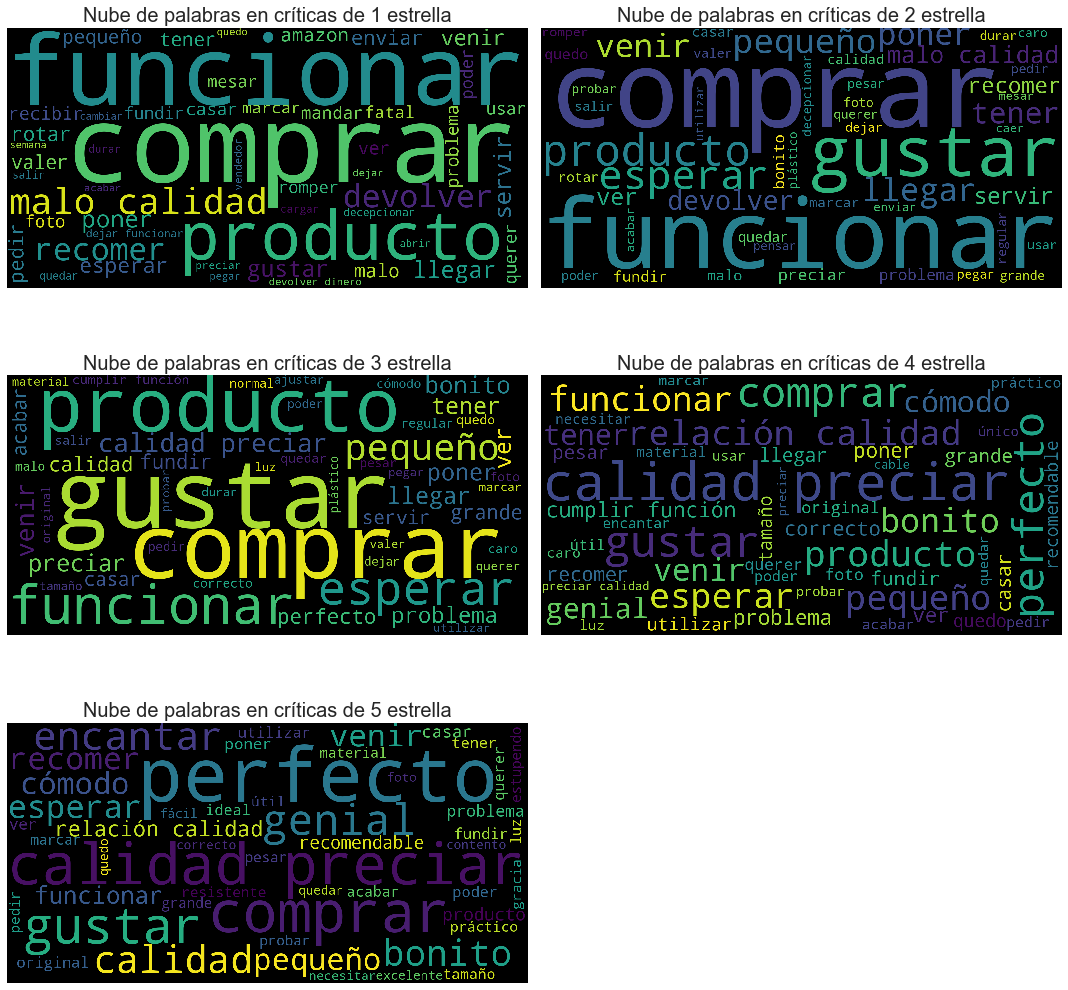

In [39]:
plt.figure(figsize=(15,15))

plt.subplot(321)
u_string=(" ").join(r_1s)
wc = WordCloud(max_words = 50, width = 1600 , height = 800 ).generate(u_string)
plt.imshow(wc)
plt.axis("off")
plt.title('Nube de palabras en críticas de 1 estrella', fontsize=20)

plt.subplot(322)
u_string2=(" ").join(r_2s)
wc = WordCloud(max_words = 50, width = 1600 , height = 800 ).generate(u_string2)
plt.imshow(wc)
plt.axis("off")
plt.title('Nube de palabras en críticas de 2 estrella', fontsize=20)

plt.subplot(323)
u_string3=(" ").join(r_3s)
wc = WordCloud(max_words = 50, width = 1600 , height = 800 ).generate(u_string3)
plt.imshow(wc)
plt.axis("off")
plt.title('Nube de palabras en críticas de 3 estrella', fontsize=20)

plt.subplot(324)
u_string4=(" ").join(r_4s)
wc = WordCloud(max_words = 50, width = 1600 , height = 800 ).generate(u_string4)
plt.imshow(wc)
plt.axis("off")
plt.title('Nube de palabras en críticas de 4 estrella', fontsize=20)

plt.subplot(325)
u_string5=(" ").join(r_5s)
wc = WordCloud(max_words = 50, width = 1600 , height = 800 ).generate(u_string5)
plt.imshow(wc)
plt.axis("off")
plt.title('Nube de palabras en críticas de 5 estrella', fontsize=20)

plt.tight_layout()
plt.show()

Con el recurso de nube de palabras se puede observar mejor la similitud entre opiniones negativas (1, 2 y 3 estrellas) y positivas (4 y 5 estrellas). El tamaño de cada palabra indica su frecuencia o importancia en las críticas. 

Voy a graficar para poder ver mejor las frecuecias por palabra.

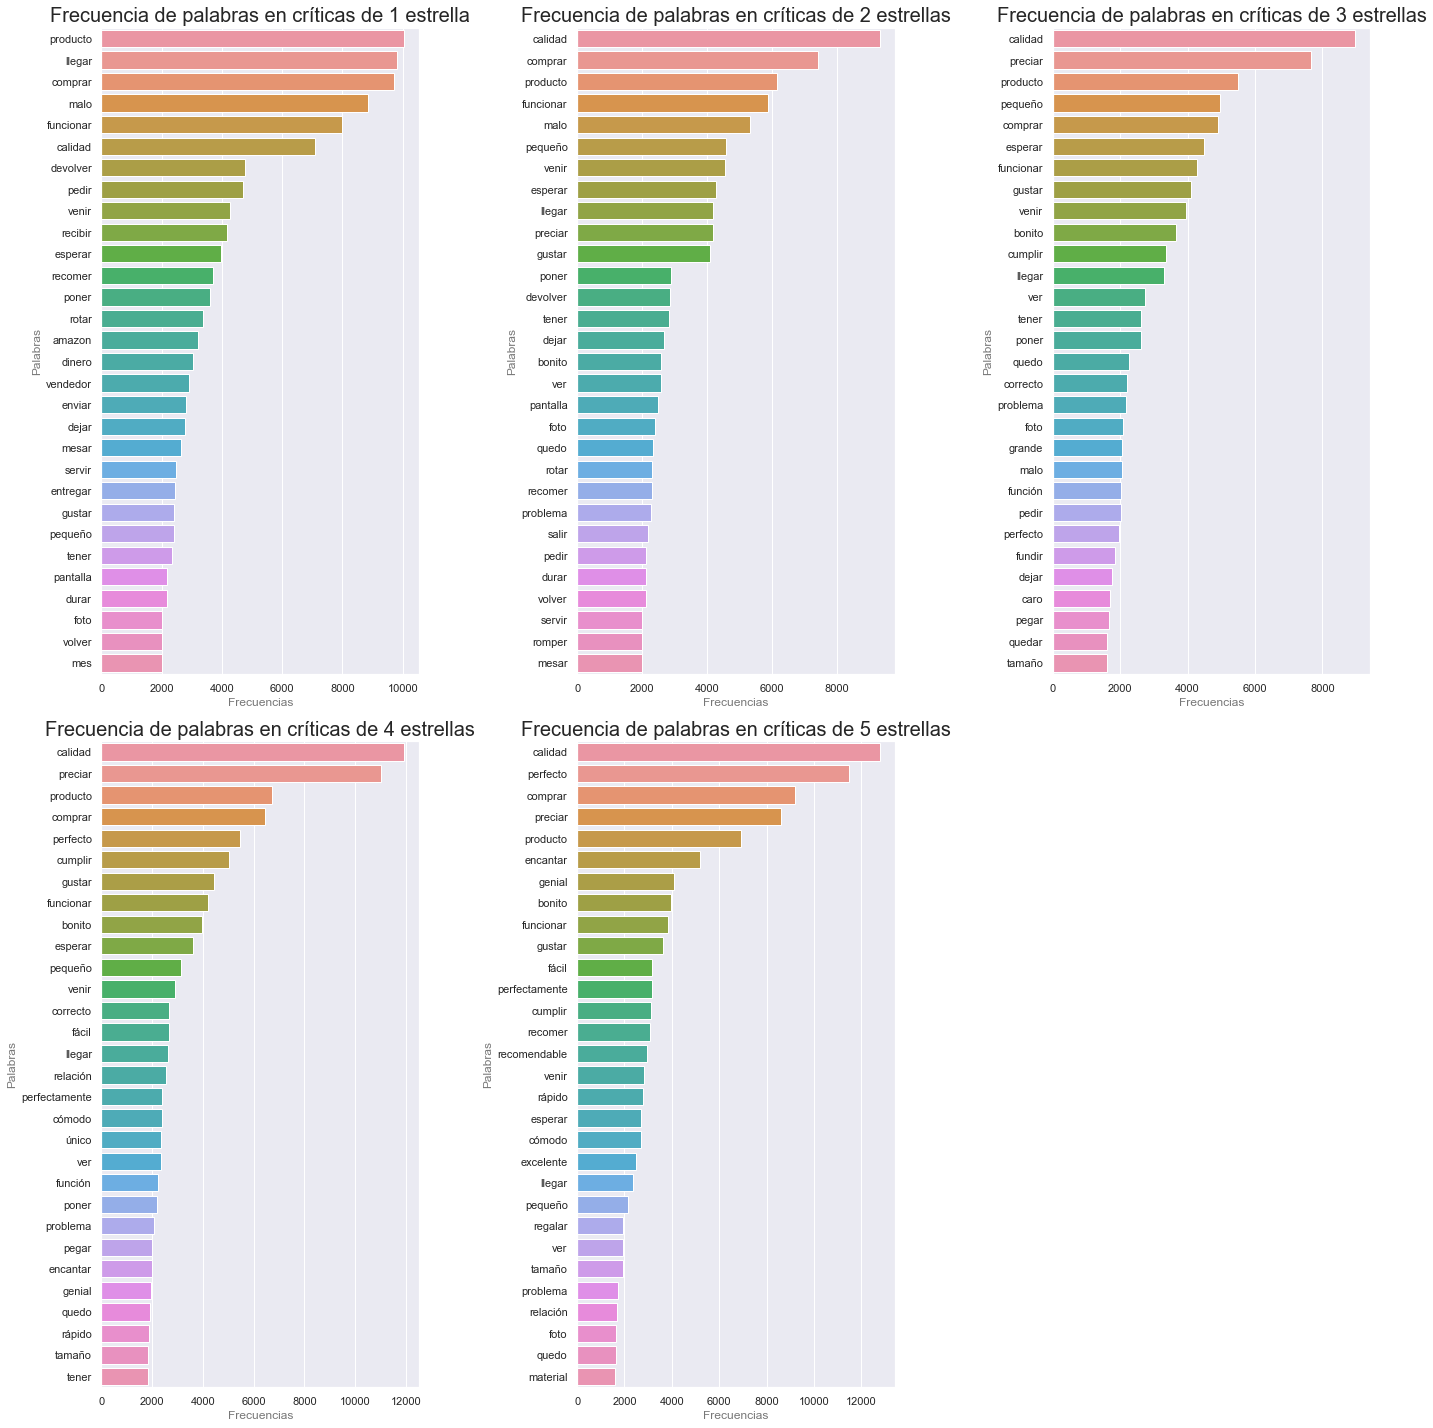

In [40]:
plt.figure(figsize = (20,20))

plt.subplot(231)
plot = sns.barplot(y = df_r_1s.iloc[:30].Words, x = df_r_1s.iloc[:30].Frequency)
plt.title('Frecuencia de palabras en críticas de 1 estrella', fontsize=20)
plt.xlabel('Frecuencias', color ='#777777')
plt.ylabel('Palabras', color ='#777777')

plt.subplot(232)
plot = sns.barplot(y  = df_r_2s.iloc[:30].Words, x = df_r_2s.iloc[:30].Frequency)
plt.title('Frecuencia de palabras en críticas de 2 estrellas', fontsize=20)
plt.xlabel('Frecuencias', color ='#777777')
plt.ylabel('Palabras', color ='#777777')

plt.subplot(233)
plot = sns.barplot(y  = df_r_3s.iloc[:30].Words, x = df_r_3s.iloc[:30].Frequency)
plt.title('Frecuencia de palabras en críticas de 3 estrellas', fontsize=20)
plt.xlabel('Frecuencias', color ='#777777')
plt.ylabel('Palabras', color ='#777777')

plt.subplot(234)
plot = sns.barplot(y  = df_r_4s.iloc[:30].Words, x = df_r_4s.iloc[:30].Frequency)
plt.title('Frecuencia de palabras en críticas de 4 estrellas', fontsize=20)
plt.xlabel('Frecuencias', color ='#777777')
plt.ylabel('Palabras', color ='#777777')

plt.subplot(235)
plot = sns.barplot(y  = df_r_5s.iloc[:30].Words, x = df_r_5s.iloc[:30].Frequency)
plt.title('Frecuencia de palabras en críticas de 5 estrellas', fontsize=20)
plt.xlabel('Frecuencias', color ='#777777')
plt.ylabel('Palabras', color ='#777777')

plt.tight_layout()
plt.show()

Voy a comprobar una idea que tengo: ¿las criticas negativas tienen más palabras que las positivas?

Creo una columna con la cuenta de caracteres por crítica:

In [41]:
df_amazon['count_word'] = df_amazon["review_full"].apply(lambda x: len(str(x).split()))
df_amazon.head()

,stars,review_body,review_title,product_category,review_full,review_lemm,count_word
0,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,wireless,"Mala compra Malisimo, muy grande demasiado apa...",malo comprar malisimo grande aparatoso y prote...,12
1,1,No he recibido el pedido no la devolución,No lo he recibido,apparel,No lo he recibido No he recibido el pedido no ...,recibir recibir pedir devolución,12
2,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,sports,Que no aprieta bien en el manillar Tengo que b...,apretar manillar buscar sistema funcionar abra...,35
3,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,home_improvement,Brocas de mantequilla Utilicé las brocas de me...,broca mantequilla utilizar broca menor diámetr...,55
4,1,No me gusta su olor a viejo y aspecto malo,No me gusta,beauty,No me gusta No me gusta su olor a viejo y aspe...,gustar gustar olor a viejo y aspecto malo,13


¿Cual es el número de palabras promedio por estrellas?

In [42]:
avg_w = df_amazon.groupby(['stars'])[['count_word']].mean()
avg_w = avg_w.dropna(axis=0)
print(avg_w)

       count_word
stars            
1       32.023286
2       34.969405
3       32.242119
4       28.965952
5       27.383048


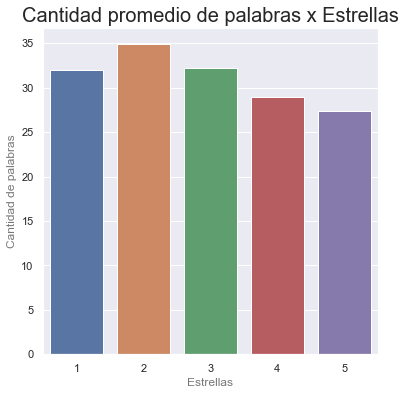

In [43]:
plt.figure(figsize=(6,6)) #Grafico
sns.barplot(data = df_amazon, x = "stars", y = "count_word", ci = None )
plt.title('Cantidad promedio de palabras x Estrellas', fontsize= 20)
plt.xlabel('Estrellas', color ='#777777')
plt.ylabel('Cantidad de palabras', color ='#777777')
plt.show()

Si, hay una tendencia a escribir más ante las malas experiencias.

### B- Machine Learning

Para comenzar a trabajar ML usaré la división prolija de los dataset bajadas originalmente: data_train, data_test y data para validar.

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [45]:
data_test['review_full'] = data_test['review_title'] + ' ' + data_test['review_body']
data_test.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,review_full
0,es_0038754,product_es_0113523,reviewer_es_0580071,1,no me llego el articulo me lo mando por correo...,no me llego,es,wireless,no me llego no me llego el articulo me lo mand...
1,es_0748979,product_es_0017036,reviewer_es_0819733,1,"la mensajería horrible, no compro mas",amazon sigue sin cumplir en las entregas,es,home,amazon sigue sin cumplir en las entregas la me...
2,es_0411746,product_es_0138642,reviewer_es_0508607,1,Estoy muy decepcionado con el vendedor ya que ...,ESTAFA EN EL ENVÍO,es,toy,ESTAFA EN EL ENVÍO Estoy muy decepcionado con ...
3,es_0786686,product_es_0170887,reviewer_es_0491157,1,Mi valoración no es sobre el producto sino sob...,Estafa de Amazon,es,home,Estafa de Amazon Mi valoración no es sobre el ...
4,es_0429700,product_es_0710642,reviewer_es_0008745,1,Pues tenía interés en este libro y probé la ve...,No conseguí pasar de la portada en Kindle,es,digital_ebook_purchase,No conseguí pasar de la portada en Kindle Pues...


In [46]:
data_train['review_full'] = data_train['review_title'] + ' ' + data_train['review_body']
data_train.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,review_full
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics,television Nevir Nada bueno se me fue ka panta...
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics,Dinero tirado a la basura con esta compra Horr...
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore,solo llega una unidad cuando te obligan a comp...
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless,PRODUCTO NO RECIBIDO. No entro en descalificar...
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes,Devuelto Llega tarde y co la talla equivocada


In [47]:
data['review_full'] = data['review_title'] + ' ' + data['review_body']
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,review_full
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless,"Mala compra Malisimo, muy grande demasiado apa..."
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel,No lo he recibido No he recibido el pedido no ...
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports,Que no aprieta bien en el manillar Tengo que b...
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement,Brocas de mantequilla Utilicé las brocas de me...
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty,No me gusta No me gusta su olor a viejo y aspe...


Para avanzar en ML unifico la review en 1 columna(`review_full`) y eliminaré el resto de columnas de review. Y el resto de columnas que no me servirán en este caso.

In [48]:
data_test = data_test.drop(columns=['language', 'review_id', 'product_id', 'reviewer_id', 'review_body', 'review_title'])
data_train = data_train.drop(columns=['language', 'review_id', 'product_id', 'reviewer_id', 'review_body', 'review_title'])
data= data.drop(columns=['language', 'review_id', 'product_id', 'reviewer_id', 'review_body', 'review_title'])

In [49]:
data_test

,stars,product_category,review_full
0,1,wireless,no me llego no me llego el articulo me lo mand...
1,1,home,amazon sigue sin cumplir en las entregas la me...
2,1,toy,ESTAFA EN EL ENVÍO Estoy muy decepcionado con ...
3,1,home,Estafa de Amazon Mi valoración no es sobre el ...
4,1,digital_ebook_purchase,No conseguí pasar de la portada en Kindle Pues...
...,...,...,...
4995,5,wireless,Perfectos para lo que sirven Para lo que cuest...
4996,5,wireless,"Buen vendedor, rápido y fiable. Material muy f..."
4997,5,home,medallas con bonito grabado Se ve bien el grabado
4998,5,sports,timbre lo compré para mi bici pero finalmente ...


In [50]:
data_train

,stars,product_category,review_full
0,1,electronics,television Nevir Nada bueno se me fue ka panta...
1,1,electronics,Dinero tirado a la basura con esta compra Horr...
2,1,drugstore,solo llega una unidad cuando te obligan a comp...
3,1,wireless,PRODUCTO NO RECIBIDO. No entro en descalificar...
4,1,shoes,Devuelto Llega tarde y co la talla equivocada
...,...,...,...
199995,5,electronics,Tal y como se describe Mando funciona perfecta...
199996,5,electronics,Funciona perfectamente Compré la batería con c...
199997,5,apparel,Buena calidad. Buena calidad. Satisfecha con l...
199998,5,toy,Recomendado Perfecto para el cumple de mi hijo


In [51]:
data

,stars,product_category,review_full
0,1,wireless,"Mala compra Malisimo, muy grande demasiado apa..."
1,1,apparel,No lo he recibido No he recibido el pedido no ...
2,1,sports,Que no aprieta bien en el manillar Tengo que b...
3,1,home_improvement,Brocas de mantequilla Utilicé las brocas de me...
4,1,beauty,No me gusta No me gusta su olor a viejo y aspe...
...,...,...,...
4995,5,home,guadalupe Me ha encantado la cesta. Ha llegado...
4996,5,camera,calidad precio Desempeña su función correctamente
4997,5,toy,Excelente Me ha encantado la diadema! Las flor...
4998,5,wireless,"Genial A mi me gustan mucho las fundas TPU, ya..."


Continuo con lemización.

In [52]:
#data_test['review_lemm'] = ''
#stop_words = nlp.Defaults.stop_words

#for i in range(data_test.shape[0]):
#    review = data_test.iloc[i].review_full
#    review_tk = nltk.RegexpTokenizer('\w+').tokenize(review)
#    review_tk_lower_stop = [word.lower() for word in review_tk if word.lower() not in stop_words]
#    review_clean = ' '.join(review_tk_lower_stop)
#    review_clean = nlp(review_clean)
#    lemmas_list = [word.lemma_ for word in review_clean]
#    data_test['review_lemm'].iloc[i] = ' '.join(lemmas_list)
    
#data_test.to_csv('DS_Proyecto_03_data_test_lemma.csv', index = False, encoding = 'utf-8')

In [53]:
data_test = pd.read_csv('DS_Proyecto_03_data_test_lemma.csv')
data_test['review_lemm'] = data_test['review_lemm'].apply(str)
data_test.head()

,stars,product_category,review_full,review_lemm
0,1,wireless,no me llego no me llego el articulo me lo mand...,llegar llegar articular mandar correo normal s...
1,1,home,amazon sigue sin cumplir en las entregas la me...,amazon cumplir entregar mensajería horrible co...
2,1,toy,ESTAFA EN EL ENVÍO Estoy muy decepcionado con ...,estafar enviar decepcionar vendedor pedir a y ...
3,1,home,Estafa de Amazon Mi valoración no es sobre el ...,estafar amazon valoración producto amazon ofre...
4,1,digital_ebook_purchase,No conseguí pasar de la portada en Kindle Pues...,conseguir pasar portar kindle interés librar y...


In [54]:
#data_train['review_lemm'] = ''
#stop_words = nlp.Defaults.stop_words

#for i in range(data_train.shape[0]):
#    review = data_train.iloc[i].review_full
#    review_tk = nltk.RegexpTokenizer('\w+').tokenize(review)
#    review_tk_lower_stop = [word.lower() for word in review_tk if word.lower() not in stop_words]
#    review_clean = ' '.join(review_tk_lower_stop)
#    review_clean = nlp(review_clean)
#    lemmas_list = [word.lemma_ for word in review_clean]
#    data_train['review_lemm'].iloc[i] = ' '.join(lemmas_list)
    
#data_train.to_csv('DS_Proyecto_03_data_train_lemma.csv', index = False, encoding = 'utf-8')

In [55]:
data_train = pd.read_csv('DS_Proyecto_03_data_train_lemma.csv')
data_train['review_lemm'] = data_train['review_lemm'].apply(str)
data_train.head()

,stars,product_category,review_full,review_lemm
0,1,electronics,television Nevir Nada bueno se me fue ka panta...,television nevir ka pantalla 8 mesar y recibir...
1,1,electronics,Dinero tirado a la basura con esta compra Horr...,dinero tirar a basura comprar horrible tener c...
2,1,drugstore,solo llega una unidad cuando te obligan a comp...,llegar unidad obligar a comprar obligar a comp...
3,1,wireless,PRODUCTO NO RECIBIDO. No entro en descalificar...,producto recibir entrar descalificar vendedor ...
4,1,shoes,Devuelto Llega tarde y co la talla equivocada,devolver llegar y co tallar equivocar


In [56]:
#data['review_lemm'] = ''
#stop_words = nlp.Defaults.stop_words

#for i in range(data.shape[0]):
#    review = data.iloc[i].review_full
#    review_tk = nltk.RegexpTokenizer('\w+').tokenize(review)
#    review_tk_lower_stop = [word.lower() for word in review_tk if word.lower() not in stop_words]
#    review_clean = ' '.join(review_tk_lower_stop)
#    review_clean = nlp(review_clean)
#    lemmas_list = [word.lemma_ for word in review_clean]
#    data['review_lemm'].iloc[i] = ' '.join(lemmas_list)
    
#data.to_csv('DS_Proyecto_03_data_dev.csv', index = False, encoding = 'utf-8')

In [57]:
data = pd.read_csv('DS_Proyecto_03_data_dev.csv')
data['review_lemm'] = data['review_lemm'].apply(str)
data.head()

,stars,product_category,review_full,review_lemm
0,1,wireless,"Mala compra Malisimo, muy grande demasiado apa...",malo comprar malisimo grande aparatoso y prote...
1,1,apparel,No lo he recibido No he recibido el pedido no ...,recibir recibir pedir devolución
2,1,sports,Que no aprieta bien en el manillar Tengo que b...,apretar manillar buscar sistema funcionar abra...
3,1,home_improvement,Brocas de mantequilla Utilicé las brocas de me...,broca mantequilla utilizar broca menor diámetr...
4,1,beauty,No me gusta No me gusta su olor a viejo y aspe...,gustar gustar olor a viejo y aspecto malo


Hasta ahora entonces, tenemos un grupo de palabras por cada review (**bag of words**) lematizadas.

**TF-IDF**

TF-IDF significa "Term Frequency-Inverse Document Frequency". Term Frequency significa: cuántas veces un término aparece en un documento. La importancia de esto es que se supone que mientras más veces aparece, más importante es ese término en ese documento, y Inverse Document Frequency significa que se compara la frecuencia de la palabra en ese documento con la frecuencia en todo el corpus de documentos. A mayor frecuencia de la palabra en todos los documentos, menor puntaje tendrá. 

El valor de TF-IDF aumenta al numero de veces que una palabra aparece en el documento, proporcionalmente.

Ahora pasamos a buscar representar las palabras como un vector. Para poder aplicar todo esto, utilizaré la herramienta de Scikit-Learn, `TfidfVectorizer`. Esta se encarga de calcula los recuentos de palabras, los valores idf y tf-idf todos a la vez, conviertiendo una colección de documentos crudos a una matriz de caracteres TF-IDF.

In [58]:
list_review_test = list(data_test['review_lemm'].values) #test
calif_test = data_test['stars'].values

list_review_train = list(data_train['review_lemm'].values) #train
calif_train = data_train['stars'].values 

list_review_dev = list(data['review_lemm'].values) #data dev
calif_dev = data['stars'].values 

#TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, min_df=30)

#Transformo en matriz
matriz_review_test= tfidf.fit_transform(list_review_test)
matriz_review_train = tfidf.transform(list_review_train)
matriz_review_dev = tfidf.transform(list_review_dev)

print('Train', matriz_review_train.shape)
print('Test', matriz_review_test.shape)
print('Data dev ', matriz_review_dev.shape)

Train (200000, 340)
Test (5000, 340)
Data dev  (5000, 340)


Cambio los tipos de datos de las matrices para mayor agilidad.


In [59]:
matriz_review_train = matriz_review_train.astype('float32')
calif_train = calif_train.astype('int8')

matriz_review_test = matriz_review_test.astype('float32')
calif_test= calif_test.astype('int8')

matriz_review_dev = matriz_review_dev.astype('float32')
calif_dev= calif_dev.astype('int8')

### Modelado ML

*Implementa un modelo que, dada la crítica de un producto, asigne la cantidad de estrellas correspondiente.*

Trabajaremos con modelos de **clasificación** ya que el resultado es a buscar aquí es una clase, entre un número limitado de clases. Con clases me refiero a categorías arbitrarias según el tipo de problema, en este caso asignar a ana categoria de crítica (stars).

Defino X e y

In [60]:
#TRAIN
X_train = matriz_review_train.toarray()
y_train = calif_train

#TEST
X_test = matriz_review_test.toarray()
y_test = calif_test

#DATA
X_dev = matriz_review_dev.toarray()
y_dev = calif_dev

**Benchmark**

Tomare Gaussian Naive Bayes como punto de partida de referencia para el accuracy.

En este sentido, los modelos de Naive Bayes son una clase especial de algoritmos de clasificación de Machine Learning. Se basan en una técnica de clasificación estadística llamada “teorema de Bayes” y son algoritmos llamados "Naive" o "Inocentes", en español. En ellos se asume que las variables predictoras son independientes entre sí. En otras palabras, que la presencia de una cierta característica en un conjunto de datos no está en absoluto relacionada con la presencia de cualquier otra característica.
Proporcionan una manera fácil de construir modelos con un comportamiento muy bueno debido a su simplicidad.
Lo consiguen proporcionando una forma de calcular la probabilidad ‘posterior’ de que ocurra un cierto evento A, dadas algunas probabilidades de eventos ‘anteriores’.


*(Extraido de medium.com - https://medium.com/datos-y-ciencia/algoritmos-naive-bayes-fudamentos-e-implementaci%C3%B3n-4bcb24b307f)*

In [61]:
nb = GaussianNB()
nb.fit(X_train,y_train)
y_train_pred = nb.predict(X_train)
y_test_pred = nb.predict(X_test)

print("Accuracy train NB: ", accuracy_score(y_train, y_train_pred))
print("Accuracy test NB: ", accuracy_score(y_test, y_test_pred))

Accuracy train NB:  0.414865
Accuracy test NB:  0.4212


Matriz de Confusión

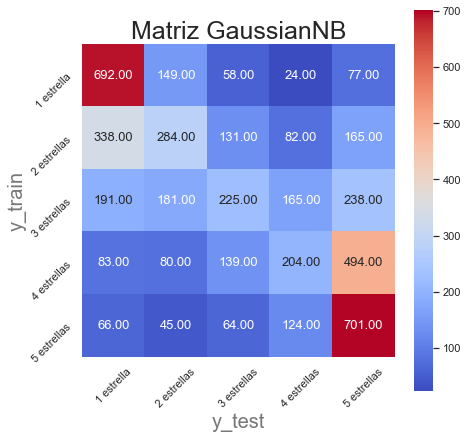

In [62]:
names=["1 estrella","2 estrellas", "3 estrellas", "4 estrellas", "5 estrellas"]
cm = confusion_matrix(y_test,y_test_pred)
f,ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 13}, cmap= 'coolwarm',ax=ax)

plt.xlabel("y_test", size =20, color ='#777777')
plt.ylabel("y_train", size =20, color ='#777777')
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title("Matriz GaussianNB", size = 25)
plt.show()

Ahora comenzaré a probar con algunos Modelos de ML

In [63]:
random_forest = RandomForestClassifier(max_depth=20, 
                                       random_state=42)

In [64]:
random_forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [65]:
y_train_pred_rf = random_forest.predict(X_train)
y_test_pred_rf = random_forest.predict(X_test)

print("Accuracy train RF: ", accuracy_score(y_train, y_train_pred_rf))
print("Accuracy test RF: ", accuracy_score(y_test, y_test_pred_rf))

Accuracy train RF:  0.48551
Accuracy test RF:  0.4256


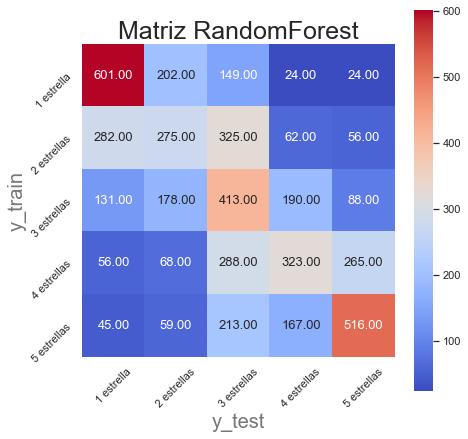

In [66]:
names=["1 estrella","2 estrellas", "3 estrellas", "4 estrellas", "5 estrellas"]
cm=confusion_matrix(y_test,y_test_pred_rf)
f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 13}, cmap= 'coolwarm',ax=ax)
plt.xlabel("y_test", size =20, color ='#777777')
plt.ylabel("y_train", size =20, color ='#777777')
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title("Matriz RandomForest", size = 25)
plt.show()

Este modelo performa mejor las estrellas 3 que el modelo anterior sin embargo poe la diferencia entre train y test puedo notar un sobre ajuste del modelo.

**Linear SVC**

In [67]:
svc = LinearSVC(C = 1, random_state=42)
svc.fit(X_train, y_train)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)

In [68]:
y_train_pred_svc= svc.predict(X_train)
y_test_pred_svc = svc.predict(X_test)

print("Accuracy train SVC: ", accuracy_score(y_train, y_train_pred_svc))
print("Accuracy test SVC: ", accuracy_score(y_test, y_test_pred_svc))

Accuracy train SVC:  0.46209
Accuracy test SVC:  0.4652


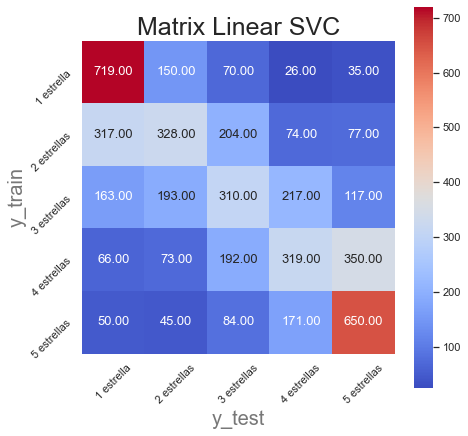

In [69]:
names=["1 estrella","2 estrellas", "3 estrellas", "4 estrellas", "5 estrellas"]
cm=confusion_matrix(y_test,y_test_pred_svc)
f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 13}, cmap= 'coolwarm',ax=ax)
plt.xlabel("y_test", size =20, color ='#777777')
plt.ylabel("y_train", size =20, color ='#777777')
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title("Matrix Linear SVC", size = 25)
plt.show()

Puedo destacar los mejores resultados en los modelos entrenados que en Benchmark, pero se puede notar un overgitting en ambos casos.

Usé como metrica el Accuracy, la precisión es el porcentaje total de los elementos clasificados correctamente. El dataset esta perfectamente balanceado por lo que considero que es una buena medida para utilizar.

In [70]:
print('--Result--')
print("Accuracy train NB: ", accuracy_score(y_train, y_train_pred))
print("Accuracy test NB: ", accuracy_score(y_test, y_test_pred))
print('--------------------------')
print("Accuracy train RF: ", accuracy_score(y_train, y_train_pred_rf))
print("Accuracy test RF: ", accuracy_score(y_test, y_test_pred_rf))
print('--------------------------')
print("Accuracy train SVC: ", accuracy_score(y_train, y_train_pred_svc))
print("Accuracy test SVC: ", accuracy_score(y_test, y_test_pred_svc))

--Result--
Accuracy train NB:  0.414865
Accuracy test NB:  0.4212
--------------------------
Accuracy train RF:  0.48551
Accuracy test RF:  0.4256
--------------------------
Accuracy train SVC:  0.46209
Accuracy test SVC:  0.4652


A modo de comparativa vemos que el modelo que mejor rinde es el de Randon Forest en train 48% pero test 42%, podria ser que esta realizando un overfitting, en este sentido entonces SVC rinde mejor en train y test a un 46%, siendo el que creo que mejor performance realiza aqui.

Luego viendo en detalle cada matriz de confusión se determina que el modelo, en este caso SVC, clasifica bien las criticas de 1 y 5 estrellas pero tiene dificultades para clasificar las reviews intermedias.

**Optmización de Modelos**

Primeor para optmizar creo que podría ser bueno mejorar el `TfidfVectorizer`. Anteriormente se estaba vectorizando palabra por palabra, ahora al variar el hiperparámetro "ngram_range" estoy teienendo en cuenta las 1000 palabras más frecuentes, pero estas son una sola palabra y una frase compuesta por 2 palabras. De esta manera le da mayor peso al contexto.

Usando los pasos anteriores nuevamente:

In [71]:
list_review_test = list(data_test['review_lemm'].values) #test
calif_test = data_test['stars'].values

list_review_train = list(data_train['review_lemm'].values) #train
calif_train = data_train['stars'].values 
 

#TfidfVectorizer optmizado
vectorizer = TfidfVectorizer(max_features=1000, min_df=30, ngram_range=(1, 2))

#Transformo en matriz
matriz_review_test= vectorizer.fit_transform(list_review_test)
matriz_review_train = vectorizer.transform(list_review_train)

print('Train', matriz_review_train.shape)
print('Test', matriz_review_test.shape)


Train (200000, 360)
Test (5000, 360)


In [72]:
print(vectorizer.vocabulary_)

{'llegar': 194, 'articular': 18, 'mandar': 199, 'normal': 223, 'amazon': 13, 'cumplir': 79, 'entregar': 125, 'comprar': 60, 'enviar': 126, 'decepcionar': 88, 'vendedor': 347, 'pedir': 244, 'plazo': 259, 'coser': 74, 'necesitar': 220, 'poner': 262, 'contactar': 65, 'recomer': 290, 'producto': 274, 'ofrecer': 227, 'devolver': 98, 'dinero': 102, 'haber': 172, 'anunciar': 14, 'preciar': 266, 'marcar': 202, 'corresponder': 71, 'caja': 38, 'vender': 348, 'dar': 84, 'devolver dinero': 99, 'pasar': 242, 'librar': 190, 'probar': 272, 'abrir': 3, 'malo': 197, 'ir': 185, 'gastar': 164, 'formar': 150, 'penar': 247, 'comentario': 57, 'casar': 48, 'cargar': 46, 'conectar': 64, 'encender': 117, 'hacer': 173, 'engañar': 122, 'mesar': 210, 'servir': 315, 'romper': 300, 'despegar': 96, 'esperar': 133, 'semana': 309, 'reembolsar': 291, 'recibir': 287, 'cámara': 82, 'quedo': 281, 'batería': 28, 'querer': 282, 'problema': 273, 'tirar': 337, 'decepción': 89, 'funcionar': 157, 'quitar': 283, 'devolución': 97

In [73]:
matriz_review_train = matriz_review_train.astype('float32')
calif_train = calif_train.astype('int8')

matriz_review_test = matriz_review_test.astype('float32')
calif_test= calif_test.astype('int8')

In [74]:
#TRAIN
X_train2 = matriz_review_train.toarray()
y_train2 = calif_train

#TEST
X_test2 = matriz_review_test.toarray()
y_test2 = calif_test

In [75]:
#REENTRENO

nb.fit(X_train2,y_train2)
y_train_pred2 = nb.predict(X_train2)
y_test_pred2 = nb.predict(X_test2)

random_forest.fit(X_train2,y_train2)
y_train_pred_rf2 = random_forest.predict(X_train2)
y_test_pred_rf2 = random_forest.predict(X_test2)

svc.fit(X_train2, y_train2)
y_train_pred_svc2= svc.predict(X_train2)
y_test_pred_svc2 = svc.predict(X_test2)

In [76]:
print('--Result1--')
print("Accuracy train NB: ", accuracy_score(y_train, y_train_pred))
print("Accuracy test NB: ", accuracy_score(y_test, y_test_pred))
print('--------------------------')
print("Accuracy train RF: ", accuracy_score(y_train, y_train_pred_rf))
print("Accuracy test RF: ", accuracy_score(y_test, y_test_pred_rf))
print('--------------------------')
print("Accuracy train SVC: ", accuracy_score(y_train, y_train_pred_svc))
print("Accuracy test SVC: ", accuracy_score(y_test, y_test_pred_svc))
print(" ")
print('--Result2--')
print("Accuracy train NB: ", accuracy_score(y_train2, y_train_pred2))
print("Accuracy test NB: ", accuracy_score(y_test2, y_test_pred2))
print('--------------------------')
print("Accuracy train RF: ", accuracy_score(y_train2, y_train_pred_rf2))
print("Accuracy test RF: ", accuracy_score(y_test2, y_test_pred_rf2))
print('--------------------------')
print("Accuracy train SVC: ", accuracy_score(y_train2, y_train_pred_svc2))
print("Accuracy test SVC: ", accuracy_score(y_test2, y_test_pred_svc2))

--Result1--
Accuracy train NB:  0.414865
Accuracy test NB:  0.4212
--------------------------
Accuracy train RF:  0.48551
Accuracy test RF:  0.4256
--------------------------
Accuracy train SVC:  0.46209
Accuracy test SVC:  0.4652
 
--Result2--
Accuracy train NB:  0.418015
Accuracy test NB:  0.4216
--------------------------
Accuracy train RF:  0.48736
Accuracy test RF:  0.4204
--------------------------
Accuracy train SVC:  0.463445
Accuracy test SVC:  0.4656


Puedo notar una imperseptiva mejora. 

SVC veo que sigue siendo la que mejor resultados nos da. Continuaré optmizando este modelo.

In [77]:
# Instancio el modelo
#svc_op = LinearSVC(dual = False, random_state= 42)

#Parámetros para el RandomizedSearchCV
#grid = {'penalty': ['l1', 'l2'],
#        'loss' : ['hinge', 'squared_hinge'],
#        'tol': [1e-2, 1e-3, 1e-4],
#        'multi_class': ['ovr', 'crammer_singer'],
#        'C': [2, 3, 4]}

In [78]:
#model_svc = RandomizedSearchCV(svc_op, grid, cv=3, scoring='accuracy', n_jobs=-1, n_iter=30, random_state=42)

#model_svc.fit(X_train2, y_train2)

In [79]:
#print("Mejores parametros: "+str(model_svc.best_params_))
#print("Mejor Score: "+str(model_svc.best_score_)+'\n')

Luego de probar y tener problemas con el sistema desde `RandomSearch` sin exito ya que el entrenamiento tuvo interrupciones en mi computadora, recalentaba y pasados dos días en actividad decidí desistir del modelo. 

Luego, encontré una optmización en `Github` de un usuario (James Paul) https://gist.github.com/jamespaultg/a1b121ed3d4418f65af0973d07ff92c7

Aquí usa una nueva librería para mi `Pipeline`: "Pipeline of transforms with a final estimator. Sequentially apply a list of transforms and a final estimator. Intermediate steps of the pipeline must be ‘transforms’, that is, they must implement fit and transform methods. The final estimator only needs to implement fit. The transformers in the pipeline can be cached using memory argument." (documentación)

La clase Pipeline de Scikit-learn está diseñada como una forma manejable de aplicar una serie de transformaciones de datos seguidas por la aplicación de un estimador (medium.com)

In [80]:
#from sklearn.pipeline import Pipeline

#optmización con Pipeline
#SVCpipe = Pipeline([('scale', StandardScaler()),
#                   ('SVC',LinearSVC())])

In [81]:
# Gridsearch to determine the value of C
#param_grid = {'SVC__C':np.arange(0.01,100,10)}
#linearSVC = GridSearchCV(SVCpipe,param_grid,cv=5,return_train_score=True)

#linearSVC.fit(X_train2,y_train2)
#print(linearSVC.best_params_)
#linearSVC.coef_
#linearSVC.intercept_

#bestlinearSVC = linearSVC.best_estimator_
#bestlinearSVC.fit(X_train2,y_train2)
#bestlinearSVC.coef_ = bestlinearSVC.named_steps['SVC'].coef_
#bestlinearSVC.score(X_train2,y_train2)

Pasadas 30 hs de entrenamiento el sistema cierra por error y me anuncia el siguiente error: `ConvergenceWarning: Liblinear failed to converge, increase the number of iterations. "the number of iterations.", ConvergenceWarning)` que, averiguando en internet, supone problemas de normalización del dataset, aunque no me queda claro cómo optmizar esto... (aún).

Finalmente, luego de una semana entrenando modelos de optmización y sin exito por problemas de máquina y recurso, decido finalizar el analisis con busqueda del mejor `C` de forma manual.

In [82]:
#for i in [2,3,5,10,15,20,50,80]:
#    clf = LinearSVC(C=i, random_state=42).fit(X_train2, y_train2)
#    scoretrain = clf.score(X_train2,y_train2)
#    scoretest  = clf.score(X_test2, y_test2)
#    print("Linear SVC valor de C:{}, training score :{:2f} , Test Score: {:2f} \n".format(i,scoretrain,scoretest))

In [83]:
svc = LinearSVC(dual = False, penalty='l1', 
                tol=0.01, multi_class='ovr', 
                loss='squared_hinge', C=5, 
                random_state=42)
svc.fit(X_train2, y_train2)
y_train_pred_op2 = svc.predict(X_train2)
y_test_pred_op2 = svc.predict(X_test2)

print("Accuracy train: ", accuracy_score(y_train2, y_train_pred_op2))
print("Accuracy test: ", accuracy_score(y_test2, y_test_pred_op2))

Accuracy train:  0.463525
Accuracy test:  0.4658


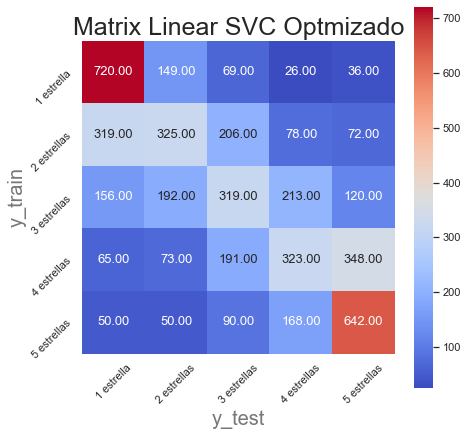

In [84]:
names=["1 estrella","2 estrellas", "3 estrellas", "4 estrellas", "5 estrellas"]
cm = confusion_matrix(y_test2,y_test_pred_op2)
f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 13}, cmap= 'coolwarm',ax=ax)

plt.xlabel("y_test", size =20, color ='#777777')
plt.ylabel("y_train", size =20, color ='#777777')
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title("Matrix Linear SVC Optmizado", size = 25)
plt.show()

No pude optmizar demasiado este modelo y el modelo sigue teniendo dificultad para identificar críticas de 2, 3 y 4 estrellas, pero es muy bueno para identificar los extremos.

#### Validación - ¿Qué información está usando el modelo para predecir?
A continuación genero 5 gráficos con los 10 features positivos mas importantes y los 10 features negativos mas importantes para cada estrella

In [85]:
list_review_test = list(data_test['review_lemm'].values) #test
calif_test = data_test['stars'].values

list_review_dev = list(data['review_lemm'].values) #data dev
calif_dev = data['stars'].values 

vectorizer = TfidfVectorizer(max_features=1000, min_df=30, ngram_range=(1, 2))
#self._vectorizer = vectorizer

matriz_review_test= vectorizer.fit_transform(list_review_test).toarray()
matriz_review_dev = vectorizer.transform(list_review_dev)

all_words = vectorizer.get_feature_names()

print('Train', matriz_review_train.shape)
print('Data dev ', matriz_review_dev.shape)

Train (200000, 360)
Data dev  (5000, 360)


In [86]:
matriz_review_train = matriz_review_train.astype('float32')
calif_train = calif_train.astype('int8')

matriz_review_dev = matriz_review_dev.astype('float32')
calif_dev= calif_dev.astype('int8')

In [87]:
X_train = matriz_review_train
y_train = calif_train

X_dev = matriz_review_dev
y_dev = calif_dev

In [88]:
svc_test = LinearSVC(dual = False, penalty='l1', tol=0.01, multi_class='ovr', 
                     loss='squared_hinge', C=5, random_state=42)
svc_test.fit(X_train, y_train)
y_train_pred = svc_test.predict(X_train)
y_test_pred = svc_test.predict(X_dev)

print("Accuracy train: ", accuracy_score(y_train, y_train_pred))
print("Accuracy test: ", accuracy_score(y_dev, y_test_pred))

Accuracy train:  0.463525
Accuracy test:  0.4496


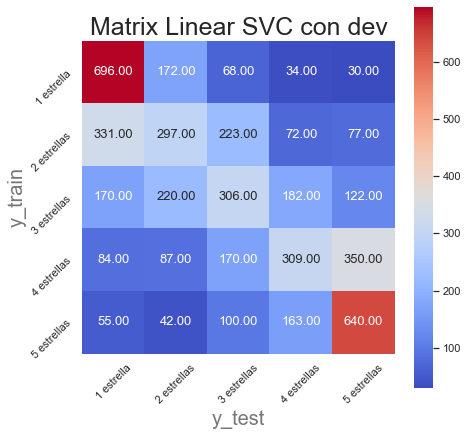

In [89]:
names=["1 estrella","2 estrellas", "3 estrellas", "4 estrellas", "5 estrellas"]
cm = confusion_matrix(y_dev,y_test_pred)
f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 13}, cmap= 'coolwarm',ax=ax)

plt.xlabel("y_test", size =20, color ='#777777')
plt.ylabel("y_train", size =20, color ='#777777')
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title("Matrix Linear SVC con dev", size = 25)
plt.show()

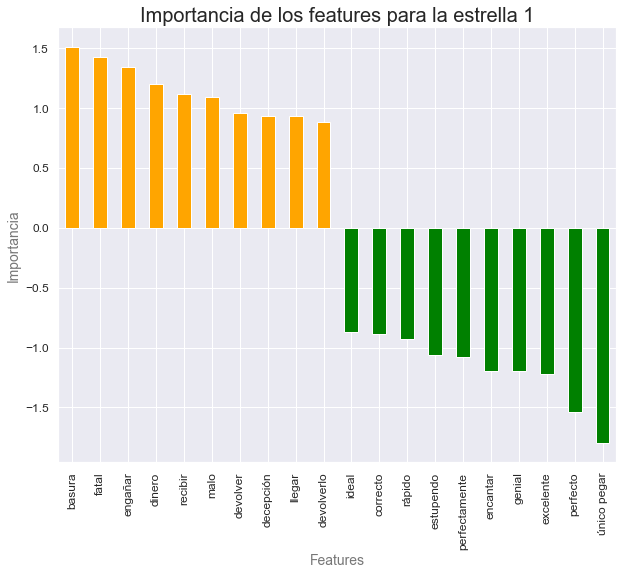

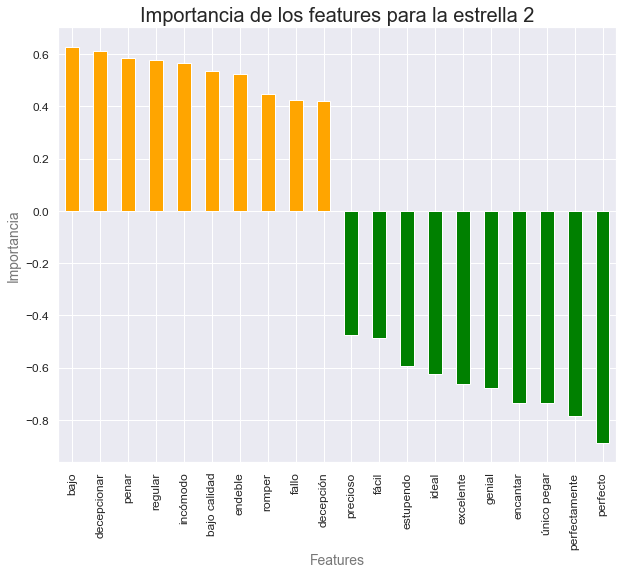

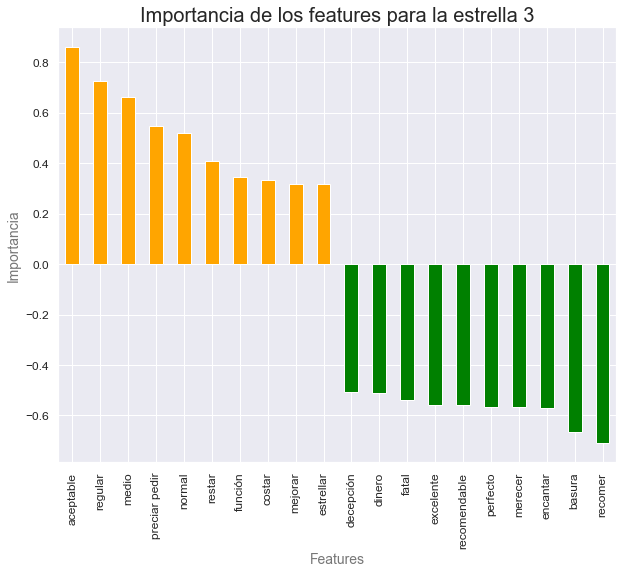

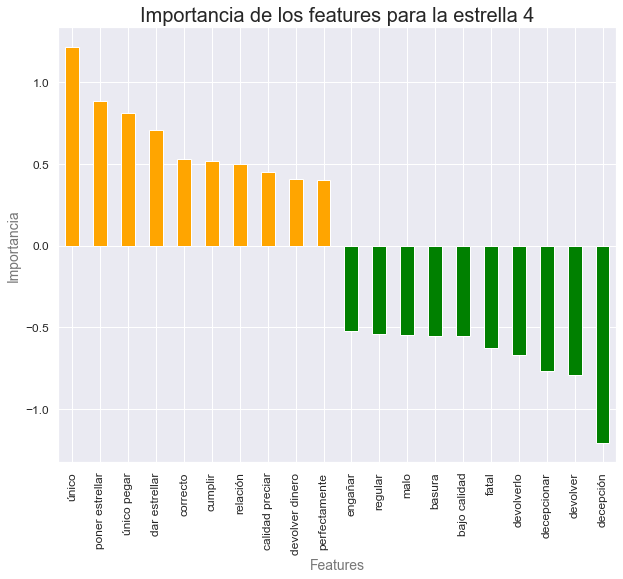

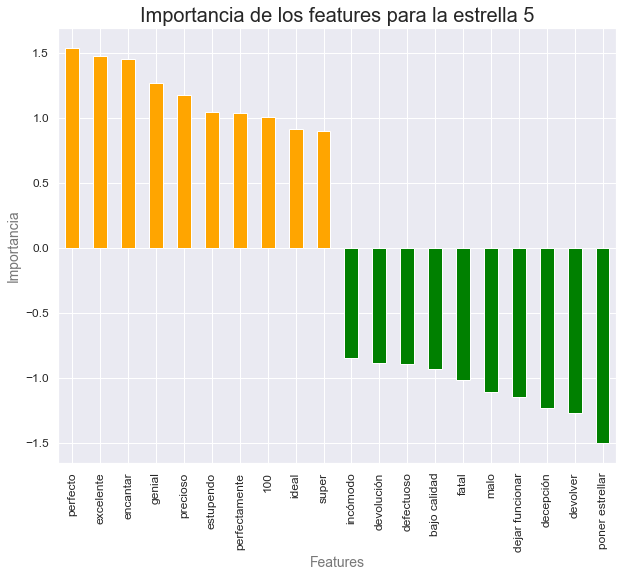

In [90]:
for index_star in range (0,5):
    coeff = list(svc.coef_[index_star])
    labels = list(all_words)
    features = pd.DataFrame()
    features['Features'] = labels
    features['Importance'] = coeff
    features = features.reset_index(drop=True)
    features_sort = features.sort_values(by=['Importance'], ascending=False)
    features_sort = features_sort.reset_index(drop=True)
    data_plot = pd.concat([features_sort.head(10), features_sort.tail(10)])
    data_plot.sort_values(by=['Importance'], ascending=False, inplace = True)
    data_plot['positive'] = data_plot['Importance'] > 0
    data_plot.set_index('Features', inplace = True)
    data_plot.Importance.plot(kind='bar', figsize = (10,8),
                              color = data_plot.positive.map({True: 'orange', False: 'green'}),
                              fontsize=12)
    plt.xlabel ('Features', fontsize=14, color ='#777777')
    plt.ylabel ('Importancia', rotation = 90, fontsize=14, color ='#777777')
    plt.title ('Importancia de los features para la estrella ' + str(index_star+1), fontsize=20)
    plt.show()

Super utiles estos gráficos y resultados para entender cómo esta funcionando nuestro modelo ya que puedo notar que ha identificado bien la intención en las criticas.

### C - Para pensar, investigar y, opcionalmente, implementar
1. ¿Valdrá la pena convertir el problema de Machine Learning en un problema binario? Es decir, asignar únicamente las etiquetas Positiva y Negativa a cada crítica y hacer un modelo que, en lugar de predecir las estrellas, prediga esa etiqueta. Pensar en qué situación puede ser útil. ¿Esperas que el desempeño sea mejor o peor?
1. ¿Hay algo que te gustaría investigar o probar?

Creo que al poner, en este caso, 5 opciones(estrellas) para calificar un servicio y producto "hace pensar" al usuario, la idea es que mientras más simple más y mejor responde el usuario. Si optamos por etiquetas Positiva y Negativa (Me gusta/No me gusta) + comentario al respecto podemos contar con más información en datos y poder tomar iniciativa de poder calificar mejor en prediciones ML. 
Vi que Netflix ha cambiado sus calificaciones por esto y creo que es mejor, o por lo menos ahora noto que a mí misma me dan ganas de calificar una pelicula una vez de verla.

Podriamos probar cambiando a binario tomando un fragmento del dataset

**0 como Negativo / 1 como Positivo**

Y luego de pensarlo y googlear al respecto puedo calificar:
* 1,2,3 = Negativo - 0
* 4,5 = Positivo - 1

In [91]:
x = {1 : 0, 2 : 0, 3 : 0, 4 : 1, 5 : 1} #diccionario

data_train['binomial'] = data_train['stars'].map(x)
data_train

,stars,product_category,review_full,review_lemm,binomial
0,1,electronics,television Nevir Nada bueno se me fue ka panta...,television nevir ka pantalla 8 mesar y recibir...,0
1,1,electronics,Dinero tirado a la basura con esta compra Horr...,dinero tirar a basura comprar horrible tener c...,0
2,1,drugstore,solo llega una unidad cuando te obligan a comp...,llegar unidad obligar a comprar obligar a comp...,0
3,1,wireless,PRODUCTO NO RECIBIDO. No entro en descalificar...,producto recibir entrar descalificar vendedor ...,0
4,1,shoes,Devuelto Llega tarde y co la talla equivocada,devolver llegar y co tallar equivocar,0
...,...,...,...,...,...
199995,5,electronics,Tal y como se describe Mando funciona perfecta...,y describir mandar funcionar perfectamente y c...,1
199996,5,electronics,Funciona perfectamente Compré la batería con c...,funcionar perfectamente comprar batería retice...,1
199997,5,apparel,Buena calidad. Buena calidad. Satisfecha con l...,calidad calidad satisfacer comprar,1
199998,5,toy,Recomendado Perfecto para el cumple de mi hijo,recomendar perfecto cumplir hijo,1


In [92]:
x = {1 : 0, 2 : 0, 3 : 0, 4 : 1, 5 : 1} #diccionario

data_test['binomial'] = data_test['stars'].map(x)
data_test

,stars,product_category,review_full,review_lemm,binomial
0,1,wireless,no me llego no me llego el articulo me lo mand...,llegar llegar articular mandar correo normal s...,0
1,1,home,amazon sigue sin cumplir en las entregas la me...,amazon cumplir entregar mensajería horrible co...,0
2,1,toy,ESTAFA EN EL ENVÍO Estoy muy decepcionado con ...,estafar enviar decepcionar vendedor pedir a y ...,0
3,1,home,Estafa de Amazon Mi valoración no es sobre el ...,estafar amazon valoración producto amazon ofre...,0
4,1,digital_ebook_purchase,No conseguí pasar de la portada en Kindle Pues...,conseguir pasar portar kindle interés librar y...,0
...,...,...,...,...,...
4995,5,wireless,Perfectos para lo que sirven Para lo que cuest...,perfecto servir costar perfecto cumplir funció...,1
4996,5,wireless,"Buen vendedor, rápido y fiable. Material muy f...",vendedor rápido y fiable material flexible y c...,1
4997,5,home,medallas con bonito grabado Se ve bien el grabado,medalla bonito grabar ver grabar,1
4998,5,sports,timbre lo compré para mi bici pero finalmente ...,timbrar comprar bici finalmente quedar xiaomi ...,1


In [93]:
list_review_train = list(data_train['review_lemm'].values)
calif_train = data_train['binomial'].values

list_review_test = list(data_test['review_lemm'].values)
calif_test = data_test['binomial'].values


vectorizer = TfidfVectorizer(max_features=1000, min_df=30, ngram_range=(1, 2))
matriz_review_train = vectorizer.fit_transform(list_review_train)
matriz_review_test = vectorizer.transform(list_review_test)

print(matriz_review_train.shape)
print(matriz_review_test.shape)

(200000, 1000)
(5000, 1000)


In [94]:
matriz_review_train = matriz_review_train.astype('float32')
calif_train = calif_train.astype('int8')

matriz_review_test = matriz_review_test.astype('float32')
calif_test = calif_test.astype('int8')

In [95]:
Xtrain = matriz_review_train.toarray()
ytrain = calif_train

Xtest = matriz_review_test.toarray()
ytest = calif_test

In [96]:
svc_b = LinearSVC(dual = False, penalty='l1', tol=0.01, multi_class='ovr', 
                loss='squared_hinge', C=10, random_state=42)
svc_b.fit(Xtrain, ytrain)
y_train_predic = svc_b.predict(Xtrain)
y_test_predic = svc_b.predict(Xtest)

print("Accuracy train: ", accuracy_score(ytrain, y_train_predic))
print("Accuracy test: ", accuracy_score(ytest, y_test_predic))

Accuracy train:  0.818875
Accuracy test:  0.818


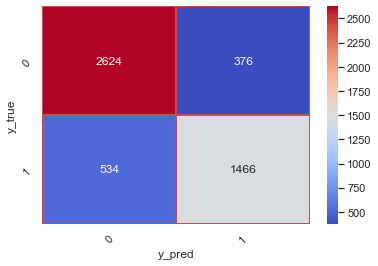

In [97]:
names=['Positivo', 'Negativo']

corr =  confusion_matrix(ytest,y_test_predic)

sns.heatmap(corr,annot=True,linewidth=.5,
            linecolor="r",cmap= 'coolwarm',fmt=".0f")

plt.xlabel("y_pred")
plt.ylabel("y_true")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

Viendo la nueva matriz, puedo notar que el modelo tiende a equivocarse más cuando predice comentarios malos, pero en realidad son buenos.

Tambien noto que al convertir el problema en un problema binario, los datasets han quedado desbalanciados, 60% de los casos son reviews negativos y 40 % positivos. Este grado de desbalance no es muy alto, por lo que el Accuracy sigue siendo una buena metrica para medir el desempeño del modelo ya en un 80% comparado con lo trabajado anteriormente.

Valido con dev:

In [98]:
x = {1 : 0, 2 : 0, 3 : 0, 4 : 1, 5 : 1}
data['binomial'] = data['stars'].map(x)
data.head()

,stars,product_category,review_full,review_lemm,binomial
0,1,wireless,"Mala compra Malisimo, muy grande demasiado apa...",malo comprar malisimo grande aparatoso y prote...,0
1,1,apparel,No lo he recibido No he recibido el pedido no ...,recibir recibir pedir devolución,0
2,1,sports,Que no aprieta bien en el manillar Tengo que b...,apretar manillar buscar sistema funcionar abra...,0
3,1,home_improvement,Brocas de mantequilla Utilicé las brocas de me...,broca mantequilla utilizar broca menor diámetr...,0
4,1,beauty,No me gusta No me gusta su olor a viejo y aspe...,gustar gustar olor a viejo y aspecto malo,0


In [99]:
list_review_train = list(data_train['review_lemm'].values)
calif_train = data_train['binomial'].values

list_review_dev = list(data['review_lemm'].values)
calif_dev = data['binomial'].values

vectorizer = TfidfVectorizer(max_features=1000, min_df=30, ngram_range=(1, 2))
matriz_review_train = vectorizer.fit_transform(list_review_train)
matriz_review_dev = vectorizer.transform(list_review_dev)

print(matriz_review_train.shape)
print(matriz_review_dev.shape)

(200000, 1000)
(5000, 1000)


In [100]:
all_words = vectorizer.get_feature_names()

matriz_review_train = matriz_review_train.astype('float32')
calif_train = calif_train.astype('int8')
matriz_review_dev = matriz_review_dev.astype('float32')
calif_dev = calif_dev.astype('int8')

In [101]:
Xtrain = matriz_review_train.toarray()
ytrain = calif_train
Xdev = matriz_review_dev.toarray()
ydev = calif_dev

In [102]:
svc_dev = LinearSVC(dual = False, penalty='l1', 
                     tol=0.01, multi_class='ovr', loss='squared_hinge', 
                     C=2, random_state=42)
svc_dev.fit(Xtrain, ytrain)
y_train_predicd = svc_dev.predict(Xtrain)
y_dev_predicd = svc_dev.predict(Xdev)

print("Accuracy train: ", accuracy_score(ytrain, y_train_predicd))
print("Accuracy dev: ", accuracy_score(ydev, y_dev_predicd))

Accuracy train:  0.818805
Accuracy dev:  0.8154


Casi identicos resultados.

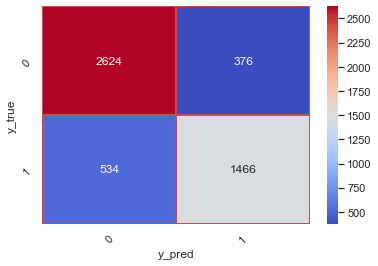

In [103]:
names=['Positivo', 'Negativo']

cor =  confusion_matrix(ydev,y_test_predic)

sns.heatmap(cor,annot=True,linewidth=.5,
            linecolor="r",cmap= 'coolwarm',fmt=".0f")

plt.xlabel("y_pred")
plt.ylabel("y_true")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

Veré la importancia de las palabras para las calificaciones binarias en este caso:

In [104]:
top_features=10
coef = svc_b.coef_.ravel()
top_positive_coefficients = np.argsort(coef)[-top_features:]
top_negative_coefficients = np.argsort(coef)[:top_features]
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])

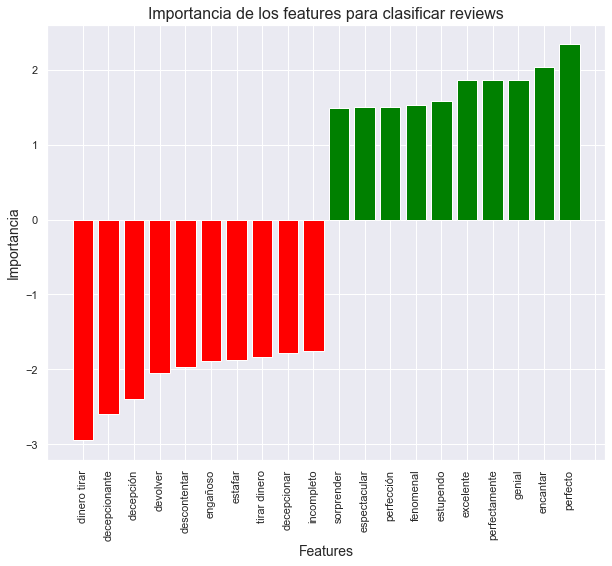

In [105]:
plt.figure(figsize=(10, 8))
colors = ['red' if c < 0 else 'green' for c in coef[top_coefficients]]

plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
feature_names = np.array(all_words)

plt.xticks(np.arange(0, 1 + 2 * top_features), feature_names[top_coefficients], rotation=90)

plt.xlabel ('Features', fontsize=14)
plt.ylabel ('Importancia', rotation = 90, fontsize=14)
plt.title ('Importancia de los features para clasificar reviews', fontsize=16)
plt.show()

In [106]:
top_features=10
coef2 = svc_dev.coef_.ravel()
top_positive_coefficients = np.argsort(coef2)[-top_features:]
top_negative_coefficients = np.argsort(coef2)[:top_features]
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])

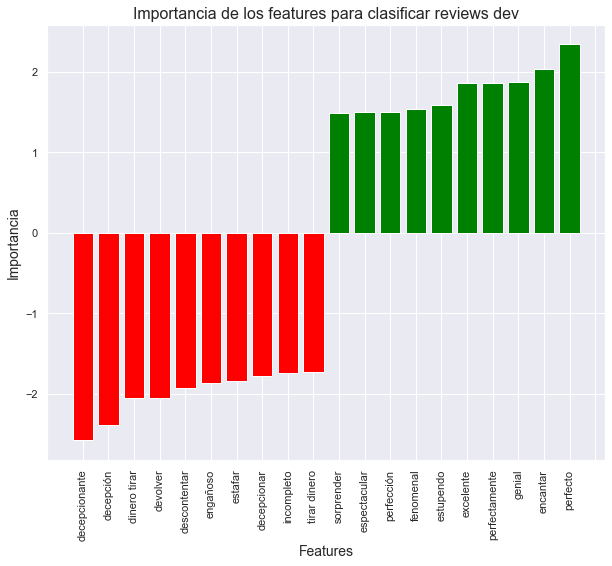

In [107]:
plt.figure(figsize=(10, 8))
colors = ['red' if c < 0 else 'green' for c in coef2[top_coefficients]]

plt.bar(np.arange(2 * top_features), coef2[top_coefficients], color=colors)
feature_names = np.array(all_words)

plt.xticks(np.arange(0, 1 + 2 * top_features), feature_names[top_coefficients], rotation=90)

plt.xlabel ('Features', fontsize=14)
plt.ylabel ('Importancia', rotation = 90, fontsize=14)
plt.title ('Importancia de los features para clasificar reviews dev', fontsize=16)
plt.show()

En el gráfico se pueden ver las 10 variables con mayor importancia para clasificar tanto las críticas negativas como las positivas.

Siendo "decepcionante", "dinero tirar", "devolver" la palabra con mayor peso en opiniones malas y "perfecto", "encantar", "genial" en el caso de buenas opioniones, este resultado es muy coherente.

Luego del analisis y como critica personal me quedo pendiente en las optmizaciones de modelos avanzados con muchas fallas y problemas de resolución por recursos de máquina y falta de conocimiento en poder resolver con grandes volumenes de datos en este dataset.

------------------------------------------
#### Inicio Proyecto 4 


## Análisis de Sentimientos

O más conocida como *Sentiment analysis* es una aplicación muy difundida de NLP, sobre todo en el campo de marketing o business intelligence, es la de sentiment analysis o análisis de opiniones. Me parece super interesante.

Para esto, trabajaré con las bibliotecas de Analisis de sentimientos de
* `NLTK `conocido `VADER` ((Valence Aware Dictionary and sEntiment Reasoner) es una herramienta de análisis de sentimientos basada en reglas y léxico que se adapta específicamente a los sentimientos expresados en las redes sociales) 
* `TextBlob` (es una biblioteca de Python (2 y 3) para procesar datos textuales. Proporciona una API simple para sumergirse en tareas comunes de procesamiento de lenguaje natural (NLP), como etiquetado de parte del discurso, extracción de frases nominales, análisis de sentimientos, clasificación, traducción y más) 

Llamaré al datasetfull suma que hice anteriormente para explorar los datos llamada `data_amazonfull` y, luego de analizarlos, tomaré sólo 50 registros aleatorios debido al tiempo que se tarda para la tradución del texto.

In [108]:
data_amazonfull

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty
...,...,...,...,...,...,...,...,...
4995,es_0685611,product_es_0919143,reviewer_es_0461769,5,Para lo que cuesta es perfecto porque cumple s...,Perfectos para lo que sirven,es,wireless
4996,es_0638242,product_es_0636134,reviewer_es_0214562,5,"Material muy flexible y cómodo, acorde a la de...","Buen vendedor, rápido y fiable.",es,wireless
4997,es_0760108,product_es_0078583,reviewer_es_0043609,5,Se ve bien el grabado,medallas con bonito grabado,es,home
4998,es_0070806,product_es_0359350,reviewer_es_0258717,5,lo compré para mi bici pero finalmente se lo h...,timbre,es,sports


In [109]:
data_SA = data_amazonfull.sample(n=50) #tomo 50 registros al azar

In [110]:
data_SA

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
40589,es_0879230,product_es_0144292,reviewer_es_0614075,2,Las bolsas son del tamaño adecuado y el materi...,La bolsa grande no se queda de pie,es,luggage
12856,es_0472778,product_es_0825562,reviewer_es_0741022,1,"Sigo esperando que contacten conmigo, dado que...",No me a llegado,es,home_improvement
73062,es_0713628,product_es_0196143,reviewer_es_0269322,2,Una patata. Plasticucho que con el tiempo se v...,Poco o nada,es,wireless
15484,es_0621016,product_es_0907810,reviewer_es_0749008,1,No puedo opinar pues no me llego nunca Amazon ...,Fallo con los envíos,es,sports
100473,es_0625037,product_es_0436002,reviewer_es_0616490,3,Es la primera vez que uso unas protecciones de...,Regular,es,drugstore
34051,es_0241136,product_es_0617584,reviewer_es_0700574,1,"Producto usado y no revisado, en la caja me he...",Dlink,es,pc
85046,es_0646407,product_es_0803139,reviewer_es_0473186,3,"A mí hijo de 7 años le han encantado, pero pen...",Por los 15 euros que Page están bien,es,toy
146241,es_0868672,product_es_0302690,reviewer_es_0583081,4,"Lo encuentro muy bueno, es el primero que teng...",Buen lector de libros.,es,other
199350,es_0422065,product_es_0306990,reviewer_es_0957821,5,Geniales los graves que se consiguen. Si tiene...,Geniales,es,pc
193892,es_0125277,product_es_0381348,reviewer_es_0118851,5,Es precioso!totalmente recomendable .Lo compré...,precioso!!,es,shoes


In [111]:
data_SA

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
40589,es_0879230,product_es_0144292,reviewer_es_0614075,2,Las bolsas son del tamaño adecuado y el materi...,La bolsa grande no se queda de pie,es,luggage
12856,es_0472778,product_es_0825562,reviewer_es_0741022,1,"Sigo esperando que contacten conmigo, dado que...",No me a llegado,es,home_improvement
73062,es_0713628,product_es_0196143,reviewer_es_0269322,2,Una patata. Plasticucho que con el tiempo se v...,Poco o nada,es,wireless
15484,es_0621016,product_es_0907810,reviewer_es_0749008,1,No puedo opinar pues no me llego nunca Amazon ...,Fallo con los envíos,es,sports
100473,es_0625037,product_es_0436002,reviewer_es_0616490,3,Es la primera vez que uso unas protecciones de...,Regular,es,drugstore
34051,es_0241136,product_es_0617584,reviewer_es_0700574,1,"Producto usado y no revisado, en la caja me he...",Dlink,es,pc
85046,es_0646407,product_es_0803139,reviewer_es_0473186,3,"A mí hijo de 7 años le han encantado, pero pen...",Por los 15 euros que Page están bien,es,toy
146241,es_0868672,product_es_0302690,reviewer_es_0583081,4,"Lo encuentro muy bueno, es el primero que teng...",Buen lector de libros.,es,other
199350,es_0422065,product_es_0306990,reviewer_es_0957821,5,Geniales los graves que se consiguen. Si tiene...,Geniales,es,pc
193892,es_0125277,product_es_0381348,reviewer_es_0118851,5,Es precioso!totalmente recomendable .Lo compré...,precioso!!,es,shoes


Eliminaré las columnas que no me sirven.

In [112]:
data_SA = data_SA.drop(columns=['language', 'review_id', 'product_id', 'reviewer_id'])

In [113]:
data_SA

,stars,review_body,review_title,product_category
40589,2,Las bolsas son del tamaño adecuado y el materi...,La bolsa grande no se queda de pie,luggage
12856,1,"Sigo esperando que contacten conmigo, dado que...",No me a llegado,home_improvement
73062,2,Una patata. Plasticucho que con el tiempo se v...,Poco o nada,wireless
15484,1,No puedo opinar pues no me llego nunca Amazon ...,Fallo con los envíos,sports
100473,3,Es la primera vez que uso unas protecciones de...,Regular,drugstore
34051,1,"Producto usado y no revisado, en la caja me he...",Dlink,pc
85046,3,"A mí hijo de 7 años le han encantado, pero pen...",Por los 15 euros que Page están bien,toy
146241,4,"Lo encuentro muy bueno, es el primero que teng...",Buen lector de libros.,other
199350,5,Geniales los graves que se consiguen. Si tiene...,Geniales,pc
193892,5,Es precioso!totalmente recomendable .Lo compré...,precioso!!,shoes


Normalizaremos los titulares
Haré el tokenizado esta vez con la libreria Natural Language Tokenizer o NLTK. Esta librería se especializa en tokenizar textos. En P3 utilicé la libreria spacy

In [114]:
#Vamos a definir una función para traducir estas etiquetas a los valores de POS que entiende `wordnet_lemmatizer`.
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [115]:
# Se carga en listas las palabras normalizadas del campo titulo
# Importamos el lemmatizar de NLTK, y creamos el objeto
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

titular_list = []

for titular in data_SA.review_title:  # probando con el cuerpo de reseñas
    # Pasamos todo a minúsculas
    titular = titular.lower()
    # Tokenizamos para separar las palabras
    #titular = nltk.word_tokenize(titular)
    titular = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(titular)

    # Aplicamos el Lemmatizer (Esto puede tardar un ratito)
    titular = [wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in titular]

    # Sacamos las Stopwords
    titular = [palabra for palabra in titular if not palabra in stopwords]

    # Eliminamos las palabras d emenos de 3 letras
    titular = [palabra for palabra in titular if len(palabra) > 3]
    # Por ultimo volvemos a unir el titular
    titular = " ".join(titular)

    # dataset["titular_normalizado"] = titular_list
    titular_list.append(titular)

In [116]:
data_SA["titular_lemm"] = titular_list
#agrego como columna al datset

In [117]:
data_SA

,stars,review_body,review_title,product_category,titular_lemm
40589,2,Las bolsas son del tamaño adecuado y el materi...,La bolsa grande no se queda de pie,luggage,bolsa grande queda
12856,1,"Sigo esperando que contacten conmigo, dado que...",No me a llegado,home_improvement,llegado
73062,2,Una patata. Plasticucho que con el tiempo se v...,Poco o nada,wireless,
15484,1,No puedo opinar pues no me llego nunca Amazon ...,Fallo con los envíos,sports,fallo envíos
100473,3,Es la primera vez que uso unas protecciones de...,Regular,drugstore,regular
34051,1,"Producto usado y no revisado, en la caja me he...",Dlink,pc,dlink
85046,3,"A mí hijo de 7 años le han encantado, pero pen...",Por los 15 euros que Page están bien,toy,euro page bien
146241,4,"Lo encuentro muy bueno, es el primero que teng...",Buen lector de libros.,other,buen lector libros
199350,5,Geniales los graves que se consiguen. Si tiene...,Geniales,pc,geniales
193892,5,Es precioso!totalmente recomendable .Lo compré...,precioso!!,shoes,precioso


Puedo notar una buena normalización, sin emabargo hay un registro que no pudo ser interpretado, y supongo por por lo ambiguo del titular.


In [118]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

review_body_list = []

for review in data_SA.review_body:  # probando con el cuerpo de reseñas
    # Pasamos todo a minúsculas
    review = review.lower()

    review = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(review)

    # Aplicamos el Lemmatizer 
    review = [wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in review]

    # Sacamos las Stopwords
    review = [palabra for palabra in review if not palabra in stopwords]

    # Eliminamos las palabras d emenos de 3 letras
    review = [palabra for palabra in review if len(palabra) > 3]
    # Por ultimo volvemos a unir el review
    review = " ".join(review)

    review_body_list.append(review)

In [119]:
data_SA["reviewbody_lemm"] = review_body_list
#agrego como columna al datset

In [120]:
data_SA

,stars,review_body,review_title,product_category,titular_lemm,reviewbody_lemm
40589,2,Las bolsas son del tamaño adecuado y el materi...,La bolsa grande no se queda de pie,luggage,bolsa grande queda,bolsas tamaño adecuado material bueno pega par...
12856,1,"Sigo esperando que contacten conmigo, dado que...",No me a llegado,home_improvement,llegado,sigo esperando contacten conmigo dado llegado ...
73062,2,Una patata. Plasticucho que con el tiempo se v...,Poco o nada,wireless,,patata plasticucho tiempo despegando raja faci...
15484,1,No puedo opinar pues no me llego nunca Amazon ...,Fallo con los envíos,sports,fallo envíos,puedo opinar pues llego nunca amazon devolvió ...
100473,3,Es la primera vez que uso unas protecciones de...,Regular,drugstore,regular,primera unas protecciones dentales dentista qu...
34051,1,"Producto usado y no revisado, en la caja me he...",Dlink,pc,dlink,producto usado revisado caja encontrado devolv...
85046,3,"A mí hijo de 7 años le han encantado, pero pen...",Por los 15 euros que Page están bien,toy,euro page bien,hijo años encantado pensaba opción comprar bat...
146241,4,"Lo encuentro muy bueno, es el primero que teng...",Buen lector de libros.,other,buen lector libros,encuentro bueno primero comodo leer
199350,5,Geniales los graves que se consiguen. Si tiene...,Geniales,pc,geniales,geniales graf consiguen cabeza pequeña posible...
193892,5,Es precioso!totalmente recomendable .Lo compré...,precioso!!,shoes,precioso,precioso totalmente recomendable compré azul p...


### Analisis de Sentimientos con NLTK (vader)

In [121]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer #llamo las librerias
from nltk import sentiment
from nltk import word_tokenize

In [122]:
analizador = SentimentIntensityAnalyzer()

In [123]:
for sentence in data_SA.titular_lemm:
    print(sentence)
    scores = analizador.polarity_scores(sentence)
    for key in scores:
        print(key, ': ', scores[key])
        print()

bolsa grande queda
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0

llegado
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0


neg :  0.0

neu :  0.0

pos :  0.0

compound :  0.0

fallo envíos
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0

regular
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0

dlink
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0

euro page bien
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0

buen lector libros
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0

geniales
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0

precioso
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0

mejorables
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0

cobra llega
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0

directo
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0

acierto
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0

llegó
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0

mala calidad
neg :  0.0

neu :  1.0

pos :  0.0

comp

In [124]:
for sentence in data_SA.reviewbody_lemm:
    print(sentence)
    scores = analizador.polarity_scores(sentence)
    for key in scores:
        print(key, ': ', scores[key])
        print()

bolsas tamaño adecuado material bueno pega parecía bolsa grande podía quedar bolsa tela normal
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0

sigo esperando contacten conmigo dado llegado pedido gustaría devolvieran dinero
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0

patata plasticucho tiempo despegando raja facilidad ensucia dedos manera exagerada grueso pierde sensibilidad tacto realmente merece pena
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0

puedo opinar pues llego nunca amazon devolvió dinero después habérmelo cobrado quién llego
neg :  0.0

neu :  0.876

pos :  0.124

compound :  0.1779

primera unas protecciones dentales dentista quería hacer unas decidí probar primero económico costado modelar darle forma correcta ponerlo boca bastante caliente quema aparte plástico duro costado modelar base apretar montón después días agua sigue haciendo sabor plástico bastante desagradable pack correcto seis férulas cajita instrucciones
neg :  0.0

neu :  1.0

pos :  0.

Con la libreria NLTK cada frase se obtienen varias puntuaciones diferentes, que podremos ver en la salida un poco más abajo. Pero antes resumimos los diversos criterios para las puntuaciones.

* neg (negativa): es un valor entre cero y uno, para decirnos lo negativa que sería esta frase.
* neu (neutral): este segundo valor nos indica la neutralidad de una frase, también en una puntuación entre cero y uno.
* pos (positiva): Igualmente que los anteriores, pero indicando lo positiva que encuentra una frase.
* compound: este es un valor entre -1 y 1 que viene a indicar de una única vez si la frase es positiva o negativa. Valores próximos a -1 indican que es muy negativa, próximos a cero indicarían que es neutra y próximos a 1 sería muy positiva. La salida para nuestro programa nos ofrecerá estas puntuaciones:

Los resultados de nuestro corpus es muy ambiguo, y noto que la mayoria lo marca como neutro. No esta haciendo un analisis correcto. 



### Analisis de Sentimientos con TextBlob

Debo pasar los titulares a ingles ya que esta libreria trabaja sóli en este idioma según lei.

In [125]:
#Función creada para traducir el texto a ingles
from textblob.exceptions import NotTranslated
def translate_comment(x):
    try:
        # Try to translate the string version of the comment
        return TextBlob(str(x)).translate(from_lang='es', to='en')
    except NotTranslated:
        return TextBlob(str(x))

In [126]:
#Agrego en nueva colum las reseñas del titular en ingles
data_SA['tituloIngles'] = data_SA['titular_lemm'].apply(translate_comment)  

In [127]:
#Agrego en nueva colum las reseñas del titular en ingles
data_SA['rew_ing'] = data_SA['reviewbody_lemm'].apply(translate_comment)  

In [128]:
data_SA

,stars,review_body,review_title,product_category,titular_lemm,reviewbody_lemm,tituloIngles,rew_ing
40589,2,Las bolsas son del tamaño adecuado y el materi...,La bolsa grande no se queda de pie,luggage,bolsa grande queda,bolsas tamaño adecuado material bueno pega par...,"(b, i, g, , b, a, g, , r, e, m, a, i, n, s)","(b, a, g, s, , s, u, i, t, a, b, l, e, , s, ..."
12856,1,"Sigo esperando que contacten conmigo, dado que...",No me a llegado,home_improvement,llegado,sigo esperando contacten conmigo dado llegado ...,"(a, r, r, i, v, e, d)","(I, ', m, , s, t, i, l, l, , w, a, i, t, i, ..."
73062,2,Una patata. Plasticucho que con el tiempo se v...,Poco o nada,wireless,,patata plasticucho tiempo despegando raja faci...,(),"(p, o, t, a, t, o, , p, l, a, s, t, i, c, , ..."
15484,1,No puedo opinar pues no me llego nunca Amazon ...,Fallo con los envíos,sports,fallo envíos,puedo opinar pues llego nunca amazon devolvió ...,"(f, a, i, l, e, d, , s, h, i, p, m, e, n, t, s)","(I, , c, a, n, , g, i, v, e, , m, y, , o, ..."
100473,3,Es la primera vez que uso unas protecciones de...,Regular,drugstore,regular,primera unas protecciones dentales dentista qu...,"(r, e, g, u, l, a, r)","(f, i, r, s, t, , s, o, m, e, , d, e, n, t, ..."
34051,1,"Producto usado y no revisado, en la caja me he...",Dlink,pc,dlink,producto usado revisado caja encontrado devolv...,"(d, l, i, n, k)","(u, s, e, d, , p, r, o, d, u, c, t, , r, e, ..."
85046,3,"A mí hijo de 7 años le han encantado, pero pen...",Por los 15 euros que Page están bien,toy,euro page bien,hijo años encantado pensaba opción comprar bat...,"(e, u, r, o, , p, a, y, , w, e, l, l)","(s, o, n, , y, e, a, r, s, , d, e, l, i, g, ..."
146241,4,"Lo encuentro muy bueno, es el primero que teng...",Buen lector de libros.,other,buen lector libros,encuentro bueno primero comodo leer,"(g, o, o, d, , r, e, a, d, e, r, , b, o, o, ...","(I, , f, i, n, d, , g, o, o, d, , f, i, r, ..."
199350,5,Geniales los graves que se consiguen. Si tiene...,Geniales,pc,geniales,geniales graf consiguen cabeza pequeña posible...,"(c, o, o, l)","(C, o, o, l, , G, r, a, f, , G, e, t, , S, ..."
193892,5,Es precioso!totalmente recomendable .Lo compré...,precioso!!,shoes,precioso,precioso totalmente recomendable compré azul p...,"(b, e, a, u, t, i, f, u, l)","(b, e, a, u, t, i, f, u, l, , t, o, t, a, l, ..."


Sigo notando que con algunos mantiene errores de interpretación, correspondientes en la lemm

Según libreria, La propiedad sentiment devuelve una tupla con nombre del formulario . La puntuación de polaridad es un valor flotante dentro del rango [-1.0, 1.0]. La subjetividad es un flotador dentro del rango [0.0, 1.0] donde 0.0 es muy objetivo y 1.0 es muy subjetivo.Sentiment(polarity, subjectivity).

In [129]:
#delcaración de funciones labda para calcular la polaridad y la subjetividad
pol = lambda x: TextBlob(x).sentiment.polarity
pol2 = lambda x: x.sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity
sub2 = lambda x: x.sentiment.subjectivity

In [130]:
#Creo dos columnas para la aplicación de polaridad y subjetividad a mis conjuntos de datos de la columna en ingles 
data_SA['polarity'] = data_SA['tituloIngles'].apply(pol2)
data_SA['subjectivity'] = data_SA['tituloIngles'].apply(sub2)
data_SA.loc[:, ['review_title', 'stars','titular_lemm','tituloIngles','polarity','subjectivity']] 

,review_title,stars,titular_lemm,tituloIngles,polarity,subjectivity
40589,La bolsa grande no se queda de pie,2,bolsa grande queda,"(b, i, g, , b, a, g, , r, e, m, a, i, n, s)",0.000000,0.100000
12856,No me a llegado,1,llegado,"(a, r, r, i, v, e, d)",0.000000,0.000000
73062,Poco o nada,2,,(),0.000000,0.000000
15484,Fallo con los envíos,1,fallo envíos,"(f, a, i, l, e, d, , s, h, i, p, m, e, n, t, s)",-0.500000,0.300000
100473,Regular,3,regular,"(r, e, g, u, l, a, r)",0.000000,0.076923
34051,Dlink,1,dlink,"(d, l, i, n, k)",0.000000,0.000000
85046,Por los 15 euros que Page están bien,3,euro page bien,"(e, u, r, o, , p, a, y, , w, e, l, l)",0.000000,0.000000
146241,Buen lector de libros.,4,buen lector libros,"(g, o, o, d, , r, e, a, d, e, r, , b, o, o, ...",0.700000,0.600000
199350,Geniales,5,geniales,"(c, o, o, l)",0.350000,0.650000
193892,precioso!!,5,precioso,"(b, e, a, u, t, i, f, u, l)",0.850000,1.000000


In [131]:
data_SA['polarity'] = data_SA['rew_ing'].apply(pol2)
data_SA['subjectivity'] = data_SA['rew_ing'].apply(sub2)
data_SA

,stars,review_body,review_title,product_category,titular_lemm,reviewbody_lemm,tituloIngles,rew_ing,polarity,subjectivity
40589,2,Las bolsas son del tamaño adecuado y el materi...,La bolsa grande no se queda de pie,luggage,bolsa grande queda,bolsas tamaño adecuado material bueno pega par...,"(b, i, g, , b, a, g, , r, e, m, a, i, n, s)","(b, a, g, s, , s, u, i, t, a, b, l, e, , s, ...",4.028571e-01,0.565714
12856,1,"Sigo esperando que contacten conmigo, dado que...",No me a llegado,home_improvement,llegado,sigo esperando contacten conmigo dado llegado ...,"(a, r, r, i, v, e, d)","(I, ', m, , s, t, i, l, l, , w, a, i, t, i, ...",0.000000e+00,0.000000
73062,2,Una patata. Plasticucho que con el tiempo se v...,Poco o nada,wireless,,patata plasticucho tiempo despegando raja faci...,(),"(p, o, t, a, t, o, , p, l, a, s, t, i, c, , ...",-2.416667e-01,0.479167
15484,1,No puedo opinar pues no me llego nunca Amazon ...,Fallo con los envíos,sports,fallo envíos,puedo opinar pues llego nunca amazon devolvió ...,"(f, a, i, l, e, d, , s, h, i, p, m, e, n, t, s)","(I, , c, a, n, , g, i, v, e, , m, y, , o, ...",0.000000e+00,0.000000
100473,3,Es la primera vez que uso unas protecciones de...,Regular,drugstore,regular,primera unas protecciones dentales dentista qu...,"(r, e, g, u, l, a, r)","(f, i, r, s, t, , s, o, m, e, , d, e, n, t, ...",-9.880952e-02,0.701190
34051,1,"Producto usado y no revisado, en la caja me he...",Dlink,pc,dlink,producto usado revisado caja encontrado devolv...,"(d, l, i, n, k)","(u, s, e, d, , p, r, o, d, u, c, t, , r, e, ...",7.000000e-01,0.600000
85046,3,"A mí hijo de 7 años le han encantado, pero pen...",Por los 15 euros que Page están bien,toy,euro page bien,hijo años encantado pensaba opción comprar bat...,"(e, u, r, o, , p, a, y, , w, e, l, l)","(s, o, n, , y, e, a, r, s, , d, e, l, i, g, ...",7.000000e-01,0.700000
146241,4,"Lo encuentro muy bueno, es el primero que teng...",Buen lector de libros.,other,buen lector libros,encuentro bueno primero comodo leer,"(g, o, o, d, , r, e, a, d, e, r, , b, o, o, ...","(I, , f, i, n, d, , g, o, o, d, , f, i, r, ...",4.500000e-01,0.577778
199350,5,Geniales los graves que se consiguen. Si tiene...,Geniales,pc,geniales,geniales graf consiguen cabeza pequeña posible...,"(c, o, o, l)","(C, o, o, l, , G, r, a, f, , G, e, t, , S, ...",3.333333e-02,0.683333
193892,5,Es precioso!totalmente recomendable .Lo compré...,precioso!!,shoes,precioso,precioso totalmente recomendable compré azul p...,"(b, e, a, u, t, i, f, u, l)","(b, e, a, u, t, i, f, u, l, , t, o, t, a, l, ...",3.250000e-01,0.491667


Analizando cada detalle puedo ver muy pocos errores, realmente está identificando la tendencia de los comentarios.

Intento graficar esto ahora en histograma:

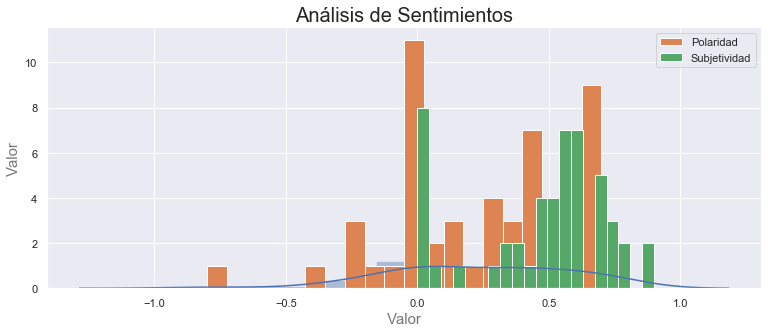

In [132]:
sns.set(context='notebook', font_scale=1.0)
plt.figure(figsize=(6.4*2, 4.8))
a=sns.distplot(data_SA['polarity'])
plt.hist(data_SA['polarity'], bins=20, label="Polaridad")
plt.hist(data_SA['subjectivity'], bins=20, label="Subjetividad")
plt.title('Análisis de Sentimientos', fontsize=20)
plt.ylabel('Valor', fontsize=15, color ='#777777')
plt.xlabel('Valor', fontsize=15, color ='#777777')
plt.legend()
plt.show()

Todavia tenemos bastante neutralidad, pero una buena distinción.

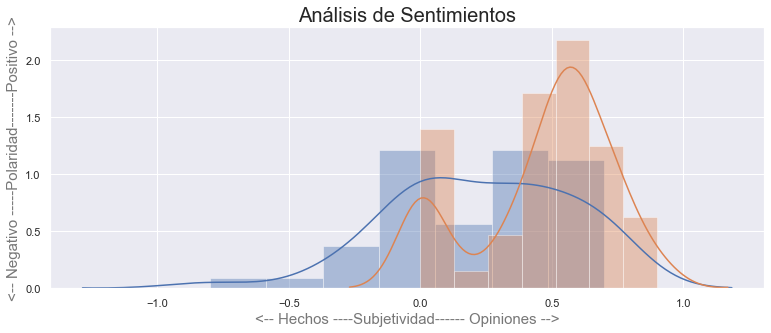

In [135]:
sns.set(context='notebook', font_scale=1.0)
plt.figure(figsize=(6.4*2, 4.8))
a = sns.distplot(data_SA['polarity'])
b = sns.distplot(data_SA['subjectivity'])

plt.title('Análisis de Sentimientos', fontsize=20)
plt.ylabel('<-- Negativo -----Polaridad-------Positivo -->', fontsize=15, color ='#777777')
plt.xlabel('<-- Hechos ----Subjetividad------ Opiniones -->', fontsize=15, color ='#777777')

plt.show()


El uso de la libreria texblob para mi conjunto de datos de ejemplo podemos ver que hay más subjetividad que polaridad positiva La ventaja de esta libreria es que es muy facil de usar. Es más se podria realizar un filtro de algún determinado producto y realizar el análisis de sentimientos. En mi caso sólo fue de 50 registros. 
 
La desventaja es que se necesita el texto en ingles ya que español no esta bien trabajado hasta el momento.